In [ ]:
 !git clone https://github.com/Goutham-K-R/EDA-Road-Traffic-Accidents.git

Cloning into 'EDA-Road-Traffic-Accidents'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 4 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 284.28 KiB | 2.27 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [ ]:
%cd EDA-Road-Traffic-Accidents

/content/EDA-Road-Traffic-Accidents/EDA-Road-Traffic-Accidents


In [ ]:
!git checkout -b eda-Assignment

Switched to a new branch 'eda-Assignment'


In [ ]:
!git status

On branch eda-Assignment
nothing to commit, working tree clean


# Road traffic accidents (RTA)

# 1). problem statement:



Road traffic accidents (RTA) are a major cause of death and injury worldwide. Understanding the factors that contribute to RTA is crucial for developing effective prevention strategies. The RTA dataset provides a rich source of information for investigating these factors. By analyzing the data and determining the most impactful variables, we could help reduce accident rates.

Objective:

This study aims to leverage the RTA dataset to develop a robust predictive model for RTAs. By identifying key contributing factors, including environmental conditions, temporal patterns, and road infrastructure characteristics, the model will enable proactive risk assessment and targeted interventions.

Reasoning:

With a dataset of RTAs, we can use data science and machine learning to help predict accidents. This is important because road accidents cause injuries, deaths, and property damage. We could then use a model to help authorities improve road safet

# 2). Data understanding

In [ ]:
import pandas as pd
import numpy as np
df_RTA= pd.read_csv('/content/EDA-Road-Traffic-Accidents/RTA Dataset.csv')
df_RTA

Time Day_of_week Age_band_of_driver Sex_of_driver  \
0      17:02:00      Monday              18-30          Male   
1      17:02:00      Monday              31-50          Male   
2      17:02:00      Monday              18-30          Male   
3       1:06:00      Sunday              18-30          Male   
4       1:06:00      Sunday              18-30          Male   
...         ...         ...                ...           ...   
12311  16:15:00   Wednesday              31-50          Male   
12312  18:00:00      Sunday            Unknown          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
0       Above high school                Employee              1-2yr   
1      Junior high school                Employee         Above 10yr   
2      Junior high school                Employee              1-2yr   
3      Junior high school                Employee             5-10yr   
4      Junior high school                Employee              2-5yr   
...                   ...                     ...                ...   
12311                 NaN                Employee              2-5yr   
12312   Elementary school                Employee             5-10yr   
12313  Junior high school                Employee             5-10yr   
12314  Junior high school                Employee         Above 10yr   
12315  Junior high school                Employee             5-10yr   

           Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  \
0               Automobile            Owner              Above 10yr   
1      Public (> 45 seats)            Owner                 5-10yrs   
2          Lorry (41?100Q)            Owner                     NaN   
3      Public (> 45 seats)     Governmental                     NaN   
4                      NaN            Owner                 5-10yrs   
...                    ...              ...                     ...   
12311       Lorry (11?40Q)            Owner                     NaN   
12312           Automobile            Owner                     NaN   
12313                Bajaj            Owner                  2-5yrs   
12314      Lorry (41?100Q)            Owner                  2-5yrs   
12315                Other            Owner                  2-5yrs   

      Defect_of_vehicle Area_accident_occured  \
0             No defect     Residential areas   
1             No defect          Office areas   
2             No defect    Recreational areas   
3             No defect          Office areas   
4             No defect      Industrial areas   
...                 ...                   ...   
12311         No defect   Outside rural areas   
12312         No defect   Outside rural areas   
12313         No defect   Outside rural areas   
12314         No defect          Office areas   
12315         No defect   Outside rural areas   

                                       Lanes_or_Medians  \
0                                                   NaN   
1                                     Undivided Two way   
2                                                 other   
3                                                 other   
4                                                 other   
...                                                 ...   
12311                                 Undivided Two way   
12312  Two-way (divided with broken lines road marking)   
12313  Two-way (divided with broken lines road marking)   
12314                                 Undivided Two way   
12315                                 Undivided Two way   

                                     Road_allignment Types_of_Junction  \
0                     Tangent road with flat terrain       No junction   
1                     Tangent road with flat terrain       No junction   
2   

In [ ]:
df_RTA.head(10)

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   
5  14:15:00      Friday              31-50          Male                 NaN   
6  17:30:00   Wednesday              18-30          Male  Junior high school   
7  17:20:00      Friday              18-30          Male  Junior high school   
8  17:20:00      Friday              18-30          Male  Junior high school   
9  17:20:00      Friday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   
5                 Unknown                NaN                  NaN   
6                Employee              2-5yr           Automobile   
7                Employee              2-5yr           Automobile   
8                Employee         Above 10yr      Lorry (41?100Q)   
9                Employee              1-2yr           Automobile   

  Owner_of_vehicle Service_year_of_vehicle Defect_of_vehicle  \
0            Owner              Above 10yr         No defect   
1            Owner                 5-10yrs         No defect   
2            Owner                     NaN         No defect   
3     Governmental                     NaN         No defect   
4            Owner                 5-10yrs         No defect   
5              NaN                     NaN               NaN   
6            Owner                     NaN         No defect   
7     Governmental              Above 10yr         No defect   
8            Owner                   1-2yr         No defect   
9            Owner                  2-5yrs         No defect   

  Area_accident_occured   Lanes_or_Medians  \
0     Residential areas                NaN   
1          Office areas  Undivided Two way   
2    Recreational areas              other   
3          Office areas              other   
4      Industrial areas              other   
5                   NaN                NaN   
6     Residential areas  Undivided Two way   
7     Residential areas              other   
8      Industrial areas              other   
9     Residential areas  Undivided Two way   

                                 Road_allignment Types_of_Junction  \
0                 Tangent road with flat terrain       No junction   
1                 Tangent road with flat terrain       No junction   
2                                            NaN       No junction   
3  Tangent road with mild grade and flat terrain           Y Shape   
4                 Tangent road with flat terrain           Y Shape   
5                                            NaN           Y Shape   
6                 Tangent road with flat terrain          Crossing   
7                 Tangent road with flat terrain           Y Shape   
8                 Tangent road with flat terrain           Y Shape   
9                 Tangent road with flat terrain           Y Shape   

  Road_surface_type Road_surface_conditions       Light_conditions  \
0     Asphalt roads                     Dry               Daylight   
1     Asphalt roads                     Dry               Daylight   
2     Asphalt roads                     Dry               Daylight   
3       Earth roads                     Dry  Darkness - lights lit   
4     Asphalt roads              

In [ ]:
df_RTA.tail(10)

Time Day_of_week Age_band_of_driver Sex_of_driver  \
12306  17:10:00      Friday              18-30          Male   
12307  17:10:00      Friday              31-50          Male   
12308  17:10:00      Friday              18-30          Male   
12309   9:05:00      Friday              31-50        Female   
12310   9:05:00      Friday              18-30          Male   
12311  16:15:00   Wednesday              31-50          Male   
12312  18:00:00      Sunday            Unknown          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
12306  Junior high school                Employee              2-5yr   
12307  Junior high school                Employee         Above 10yr   
12308  Junior high school                Employee         Above 10yr   
12309   Elementary school                Employee             5-10yr   
12310                 NaN                Employee                NaN   
12311                 NaN                Employee              2-5yr   
12312   Elementary school                Employee             5-10yr   
12313  Junior high school                Employee             5-10yr   
12314  Junior high school                Employee         Above 10yr   
12315  Junior high school                Employee             5-10yr   

        Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  \
12306    Lorry (11?40Q)            Owner                   1-2yr   
12307  Pick up upto 10Q     Governmental               Below 1yr   
12308    Lorry (11?40Q)            Owner                     NaN   
12309  Pick up upto 10Q            Owner                     NaN   
12310   Special vehicle            Owner              Above 10yr   
12311    Lorry (11?40Q)            Owner                     NaN   
12312        Automobile            Owner                     NaN   
12313             Bajaj            Owner                  2-5yrs   
12314   Lorry (41?100Q)            Owner                  2-5yrs   
12315             Other            Owner                  2-5yrs   

      Defect_of_vehicle Area_accident_occured  \
12306         No defect   Outside rural areas   
12307         No defect   Outside rural areas   
12308         No defect   Outside rural areas   
12309         No defect          School areas   
12310         No defect   Outside rural areas   
12311         No defect   Outside rural areas   
12312         No defect   Outside rural areas   
12313         No defect   Outside rural areas   
12314         No defect          Office areas   
12315         No defect   Outside rural areas   

                                       Lanes_or_Medians  \
12306                                 Undivided Two way   
12307                                 Undivided Two way   
12308                                             other   
12309                                             other   
12310  Two-way (divided with broken lines road marking)   
12311                                 Undivided Two way   
12312  Two-way (divided with broken lines road marking)   
12313  Two-way (divided with broken lines road marking)   
12314                                 Undivided Two way   
12315                                 Undivided Two way   

                                     Road_allignment Types_of_Junction  \
12306                 Tangent road with flat terrain             Other   
12307                 Tangent road with flat terrain             Other   
12308  Steep grade downward with mountainous terrain       No junction   
12309  Steep grade downward with mountainous terrain       No junction   
12310                 Tangent road with flat terrain       No junction   
12311                 Tangent road with flat terrain       No junction   
12312                                    Escarpments    

In [ ]:
df_RTA.sample(2)

Time Day_of_week Age_band_of_driver Sex_of_driver  \
7782  10:25:00    Thursday            Over 51          Male   
9326  20:55:00    Saturday              31-50          Male   

       Educational_level Vehicle_driver_relation Driving_experience  \
7782  Junior high school                Employee          Below 1yr   
9326  Junior high school                   Owner          Below 1yr   

     Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  \
7782           Other            Owner              Above 10yr   
9326      Long lorry            Owner                     NaN   

     Defect_of_vehicle Area_accident_occured  \
7782         No defect                 Other   
9326         No defect                 Other   

                                      Lanes_or_Medians  \
7782                                 Undivided Two way   
9326  Two-way (divided with broken lines road marking)   

                     Road_allignment Types_of_Junction Road_surface_type  \
7782  Tangent road with flat terrain             Other     Asphalt roads   
9326  Tangent road with flat terrain           Y Shape     Asphalt roads   

     Road_surface_conditions       Light_conditions Weather_conditions  \
7782                     Dry               Daylight             Normal   
9326             Wet or damp  Darkness - lights lit             Normal   

                   Type_of_collision  Number_of_vehicles_involved  \
7782  Vehicle with vehicle collision                            1   
9326  Vehicle with vehicle collision                            1   

      Number_of_casualties Vehicle_movement   Casualty_class Sex_of_casualty  \
7782                     1            Other  Driver or rider            Male   
9326                     2   Going straight  Driver or rider            Male   

     Age_band_of_casualty Casualty_severity Work_of_casuality  \
7782                31-50                 3            Driver   
9326                18-30                 2               NaN   

     Fitness_of_casuality Pedestrian_movement Cause_of_accident  \
7782               Normal    Not a Pedestrian   Moving Backward   
9326                  NaN    Not a Pedestrian     No distancing   

     Accident_severity  
7782     Slight Injury  
9326     Slight Injury

In [ ]:
df_RTA.shape

(12316, 32)

In [ ]:
# to see all columns in dataset
pd.set_option('display.max_columns',None)

In [ ]:
df_RTA.head(10)

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   
5  14:15:00      Friday              31-50          Male                 NaN   
6  17:30:00   Wednesday              18-30          Male  Junior high school   
7  17:20:00      Friday              18-30          Male  Junior high school   
8  17:20:00      Friday              18-30          Male  Junior high school   
9  17:20:00      Friday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   
5                 Unknown                NaN                  NaN   
6                Employee              2-5yr           Automobile   
7                Employee              2-5yr           Automobile   
8                Employee         Above 10yr      Lorry (41?100Q)   
9                Employee              1-2yr           Automobile   

  Owner_of_vehicle Service_year_of_vehicle Defect_of_vehicle  \
0            Owner              Above 10yr         No defect   
1            Owner                 5-10yrs         No defect   
2            Owner                     NaN         No defect   
3     Governmental                     NaN         No defect   
4            Owner                 5-10yrs         No defect   
5              NaN                     NaN               NaN   
6            Owner                     NaN         No defect   
7     Governmental              Above 10yr         No defect   
8            Owner                   1-2yr         No defect   
9            Owner                  2-5yrs         No defect   

  Area_accident_occured   Lanes_or_Medians  \
0     Residential areas                NaN   
1          Office areas  Undivided Two way   
2    Recreational areas              other   
3          Office areas              other   
4      Industrial areas              other   
5                   NaN                NaN   
6     Residential areas  Undivided Two way   
7     Residential areas              other   
8      Industrial areas              other   
9     Residential areas  Undivided Two way   

                                 Road_allignment Types_of_Junction  \
0                 Tangent road with flat terrain       No junction   
1                 Tangent road with flat terrain       No junction   
2                                            NaN       No junction   
3  Tangent road with mild grade and flat terrain           Y Shape   
4                 Tangent road with flat terrain           Y Shape   
5                                            NaN           Y Shape   
6                 Tangent road with flat terrain          Crossing   
7                 Tangent road with flat terrain           Y Shape   
8                 Tangent road with flat terrain           Y Shape   
9                 Tangent road with flat terrain           Y Shape   

  Road_surface_type Road_surface_conditions       Light_conditions  \
0     Asphalt roads                     Dry               Daylight   
1     Asphalt roads                     Dry               Daylight   
2     Asphalt roads                     Dry               Daylight   
3       Earth roads                     Dry  Darkness - lights lit   
4     Asphalt roads              

In [ ]:
df_RTA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:
df_RTA.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [ ]:
df_RTA.describe(include='all')

Time Day_of_week Age_band_of_driver Sex_of_driver  \
count      12316       12316              12316         12316   
unique      1074           7                  5             3   
top     15:30:00      Friday              18-30          Male   
freq         120        2041               4271         11437   
mean         NaN         NaN                NaN           NaN   
std          NaN         NaN                NaN           NaN   
min          NaN         NaN                NaN           NaN   
25%          NaN         NaN                NaN           NaN   
50%          NaN         NaN                NaN           NaN   
75%          NaN         NaN                NaN           NaN   
max          NaN         NaN                NaN           NaN   

         Educational_level Vehicle_driver_relation Driving_experience  \
count                11575                   11737              11487   
unique                   7                       4                  7   
top     Junior high school                Employee             5-10yr   
freq                  7619                    9627               3363   
mean                   NaN                     NaN                NaN   
std                    NaN                     NaN                NaN   
min                    NaN                     NaN                NaN   
25%                    NaN                     NaN                NaN   
50%                    NaN                     NaN                NaN   
75%                    NaN                     NaN                NaN   
max                    NaN                     NaN                NaN   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  \
count            11366            11834                    8388   
unique              17                4                       6   
top         Automobile            Owner                 Unknown   
freq              3205            10459                    2883   
mean               NaN              NaN                     NaN   
std                NaN              NaN                     NaN   
min                NaN              NaN                     NaN   
25%                NaN              NaN                     NaN   
50%                NaN              NaN                     NaN   
75%                NaN              NaN                     NaN   
max                NaN              NaN                     NaN   

       Defect_of_vehicle Area_accident_occured  \
count               7889                 12077   
unique                 3                    14   
top            No defect                 Other   
freq                7777                  3819   
mean                 NaN                   NaN   
std                  NaN                   NaN   
min                  NaN                   NaN   
25%                  NaN                   NaN   
50%                  NaN                   NaN   
75%                  NaN                   NaN   
max                  NaN                   NaN   

                                        Lanes_or_Medians  \
count                                              11931   
unique                                                 7   
top     Two-way (divided with broken lines road marking)   
freq                                                4411   
mean                                                 NaN   
std                                                  NaN   
min                                                  NaN   
25%                                                  NaN   
50%                                                  NaN   
75%                                                  NaN   
max                                                  NaN   

                       Road_allignment Types_of_Junction Road_surface_type  \
count                            12174             11429             12144   
unique                               9                 8               

# 3). Data visualization

## histogram

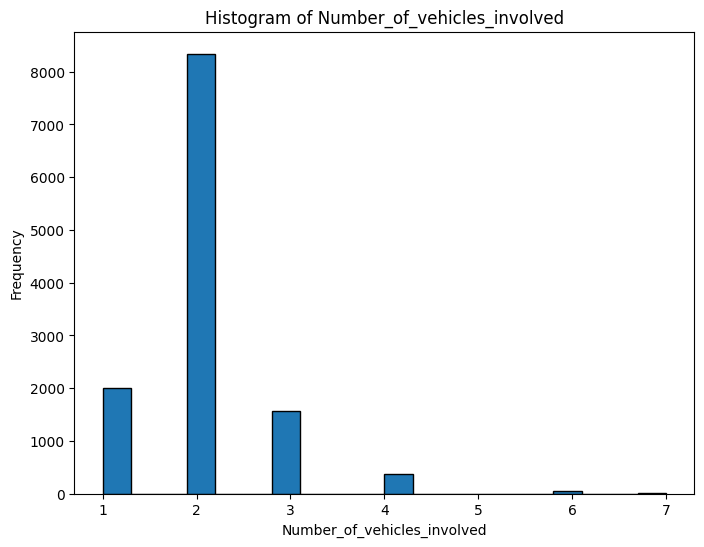

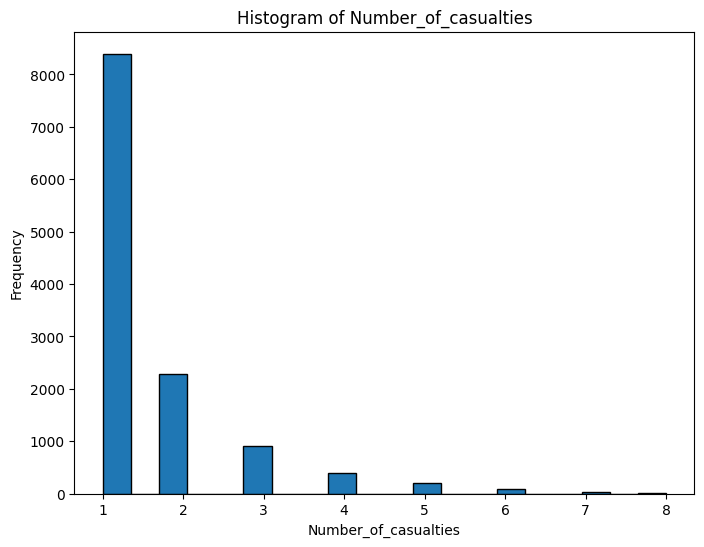

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

numerical_cols = df_RTA.select_dtypes(include=['number']).columns

for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  plt.hist(df_RTA[col], bins=20, edgecolor='black')
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

## pie chart

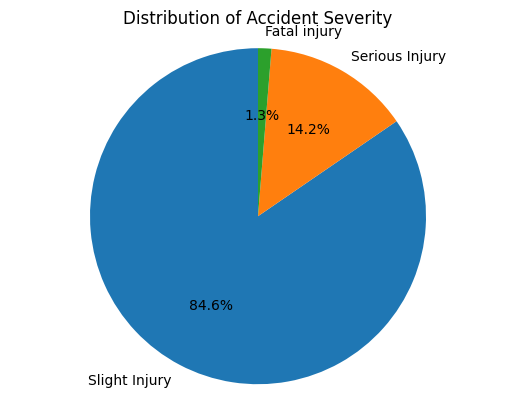

In [ ]:
value_counts = df_RTA['Accident_severity'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Accident Severity')
plt.axis('equal')
plt.show()

## count plot

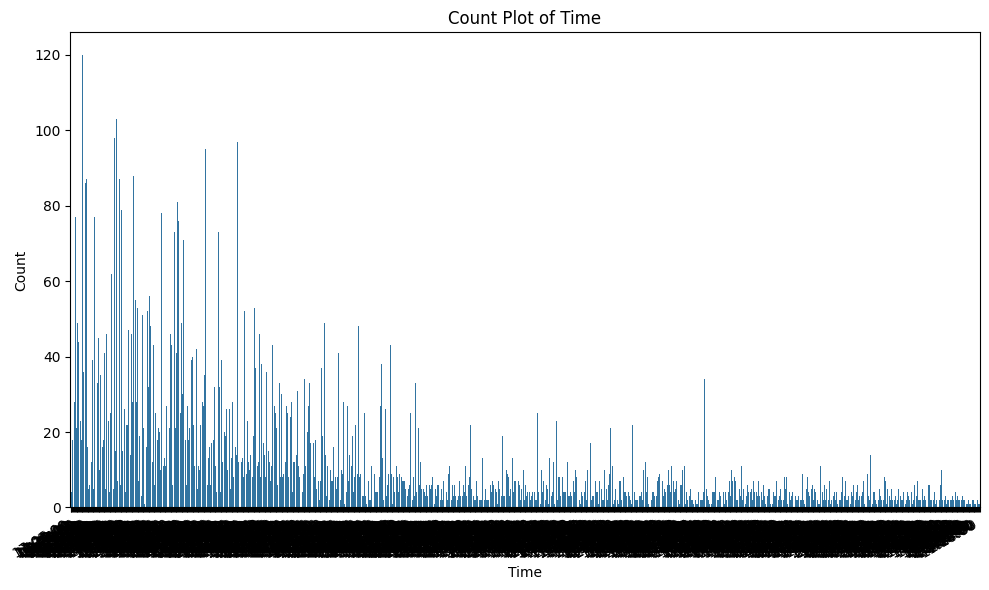

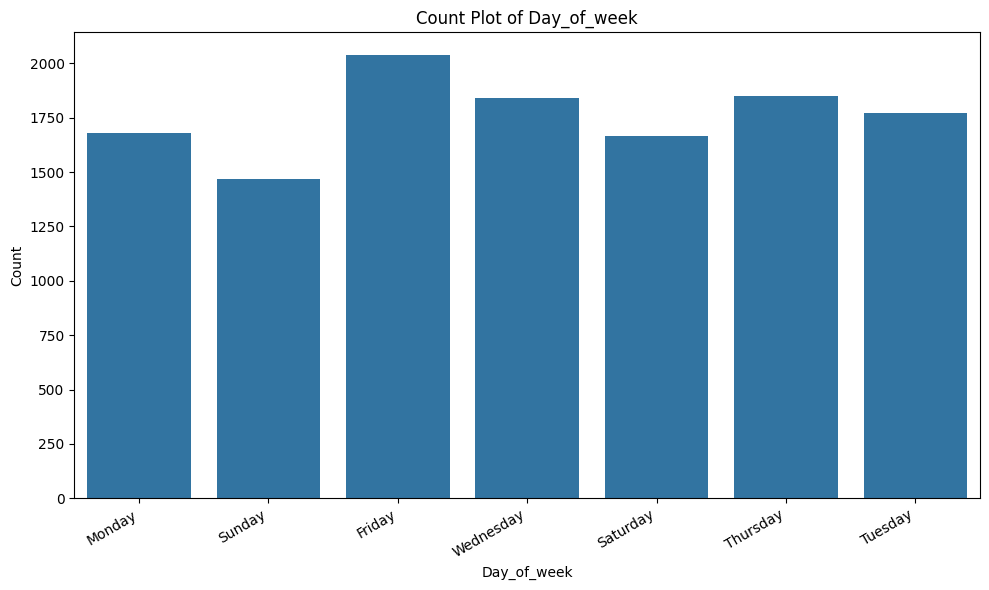

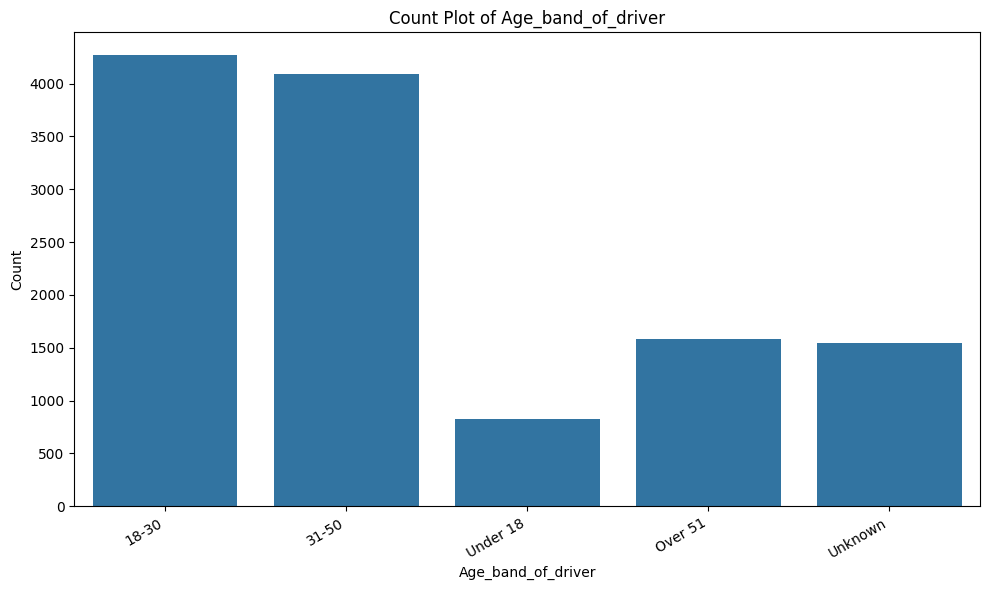

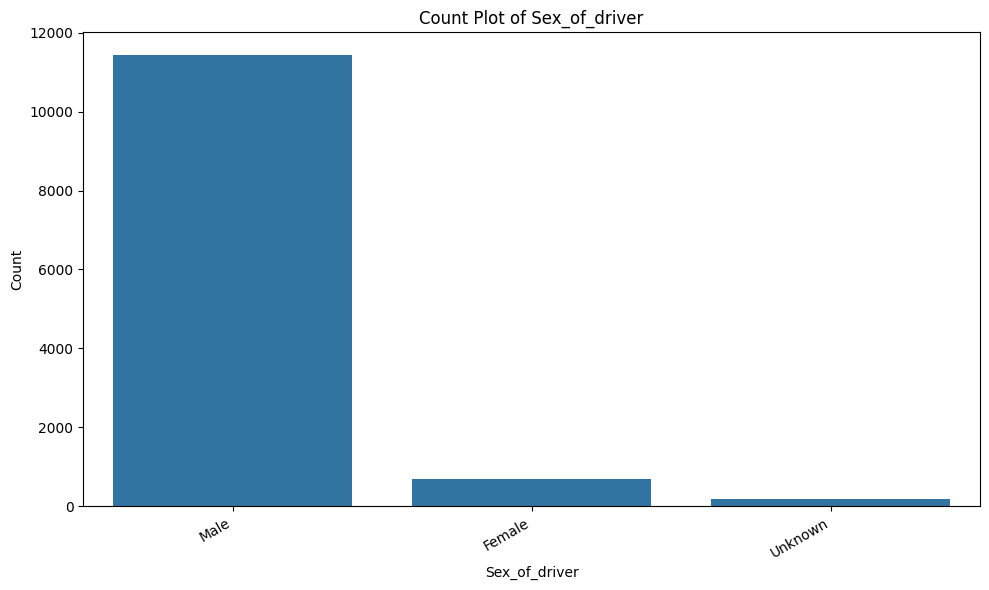

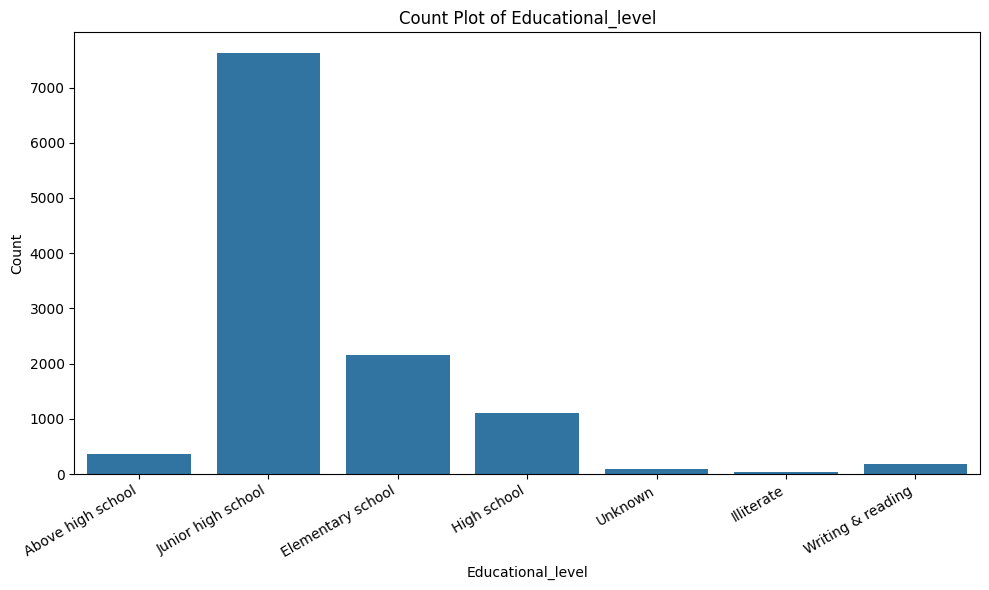

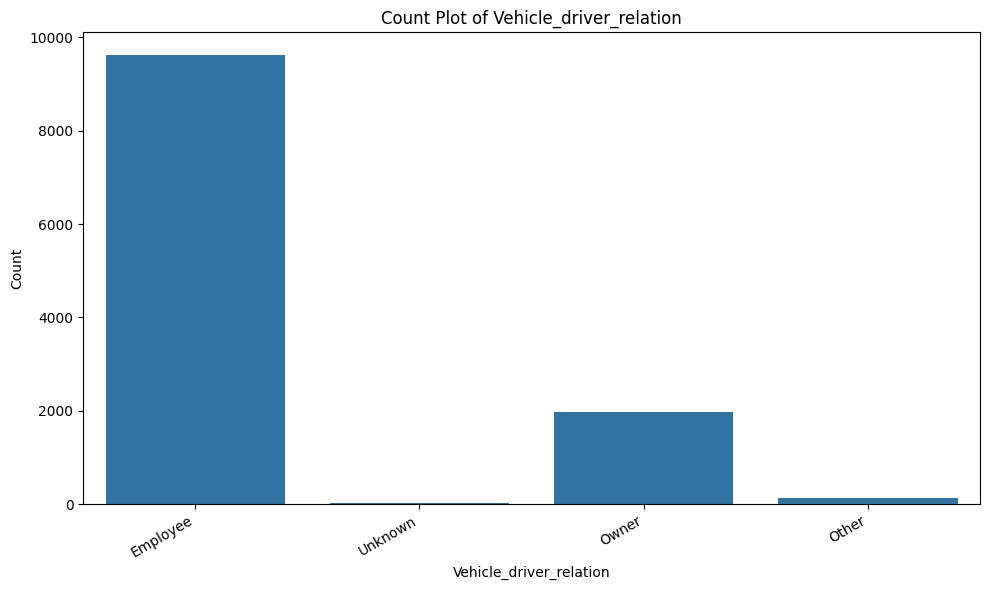

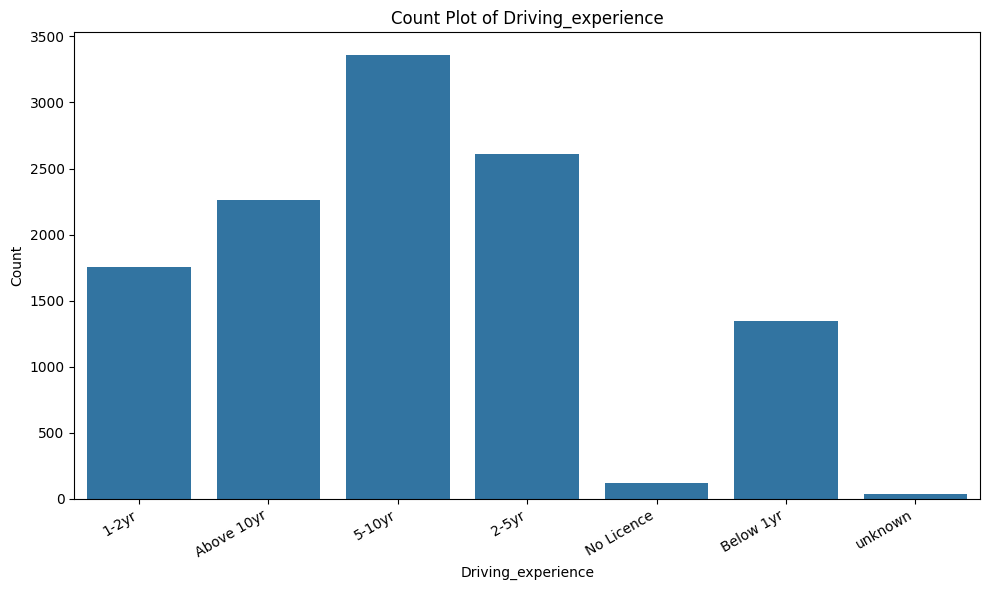

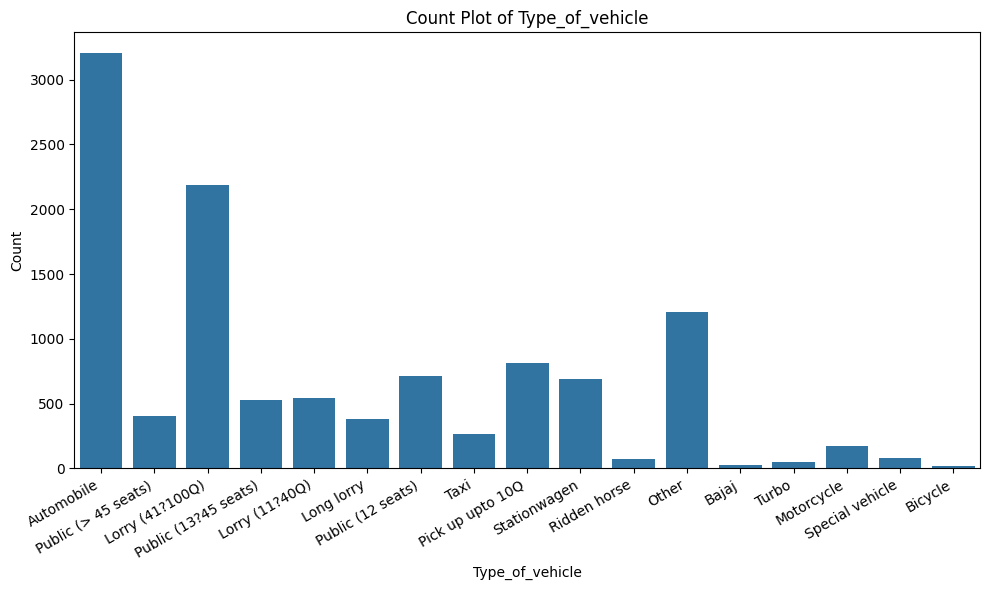

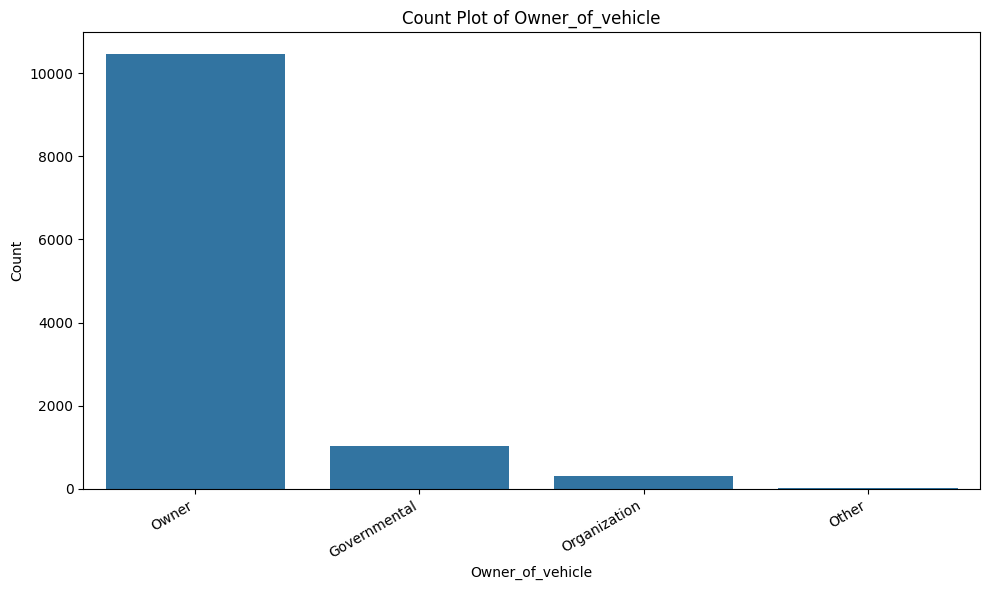

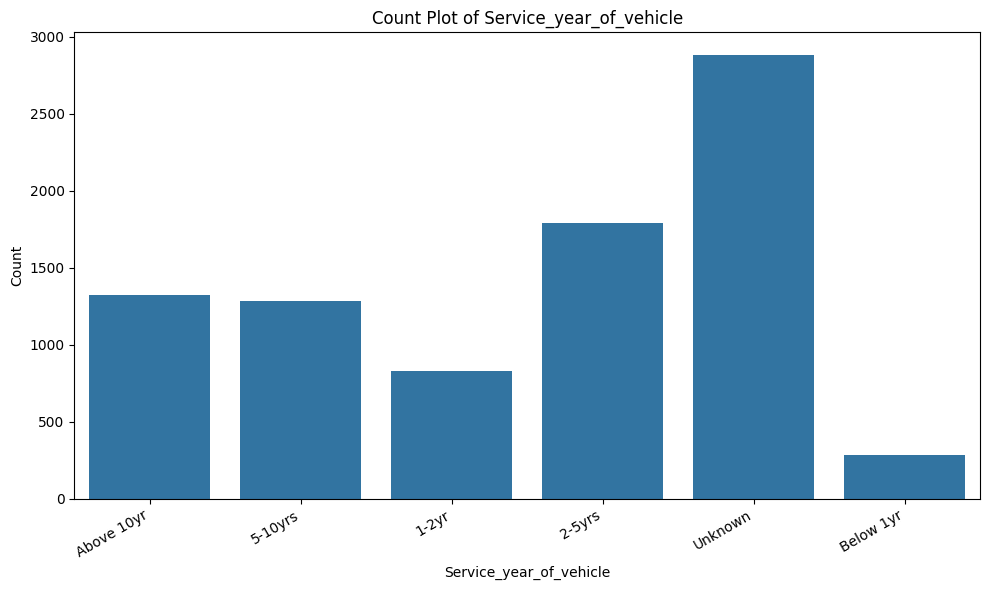

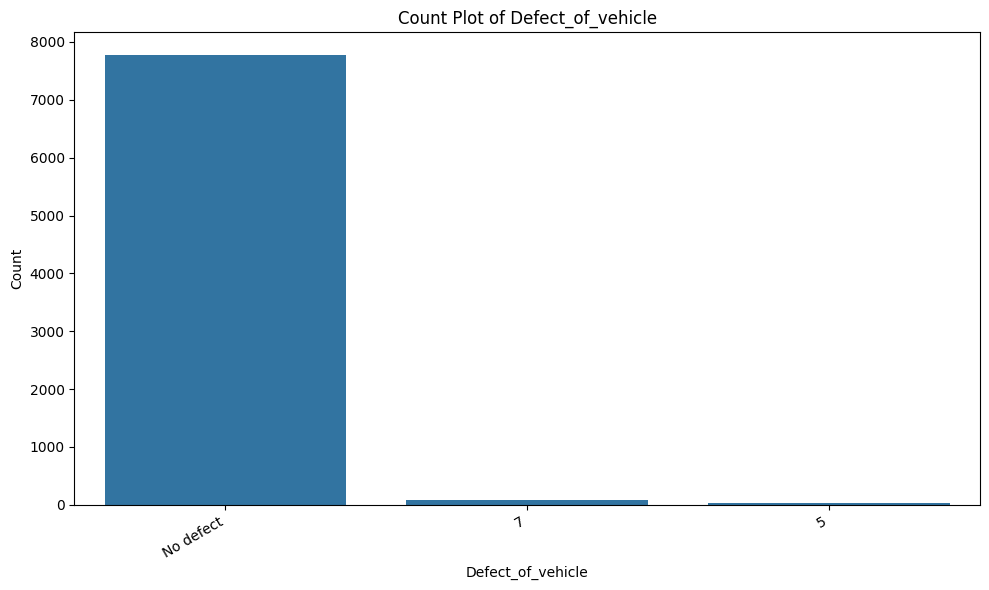

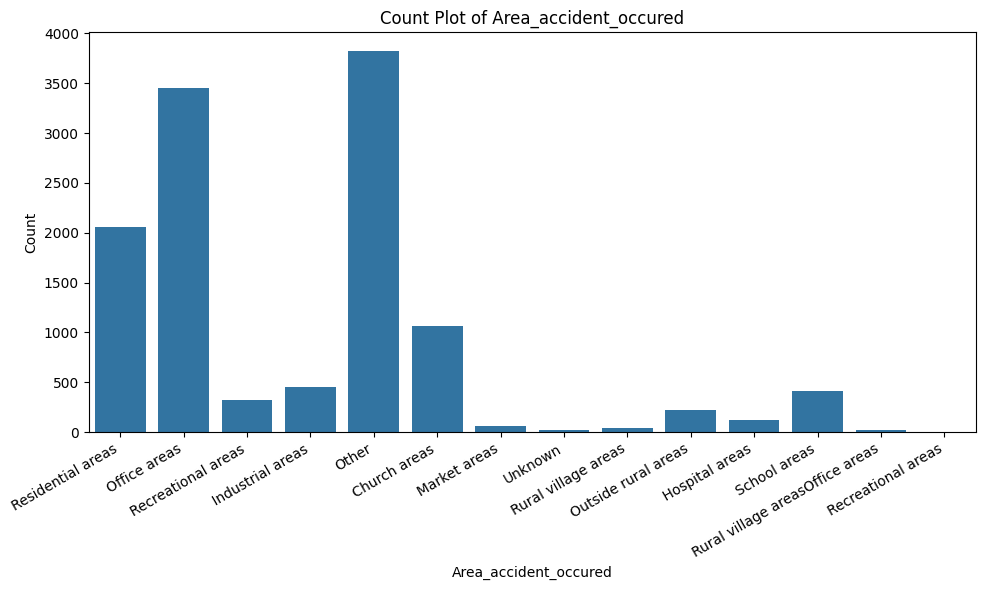

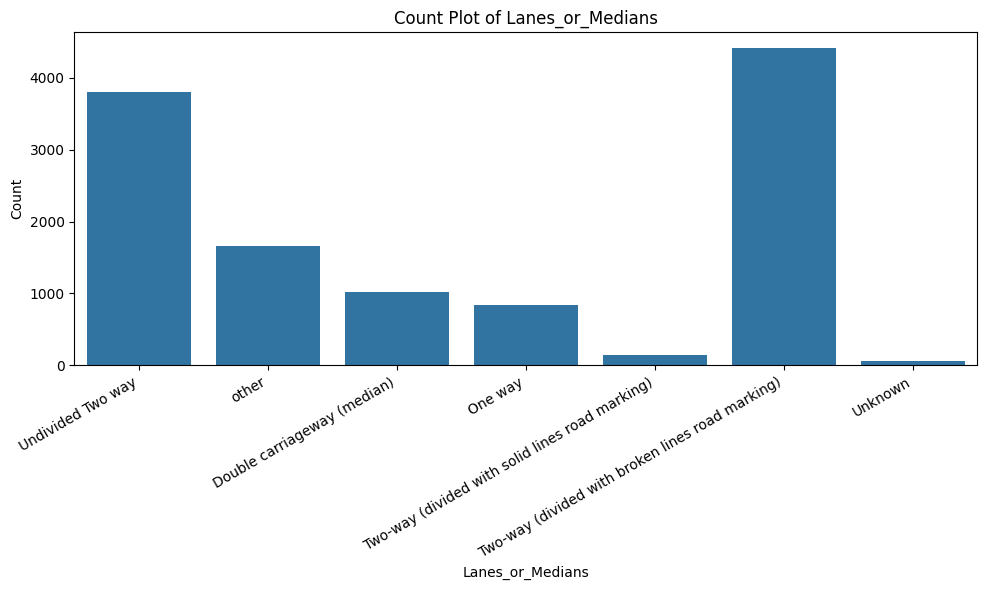

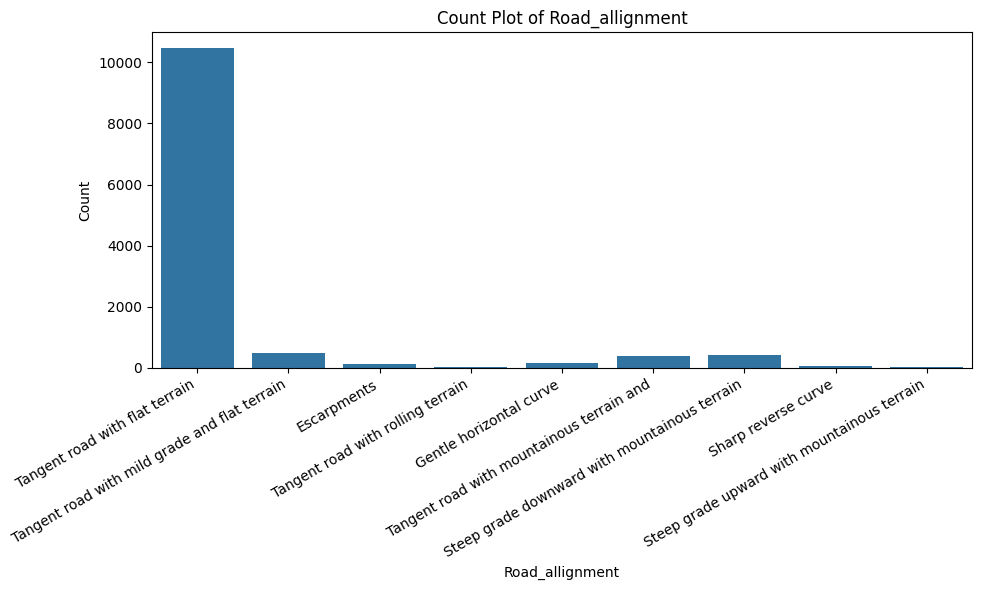

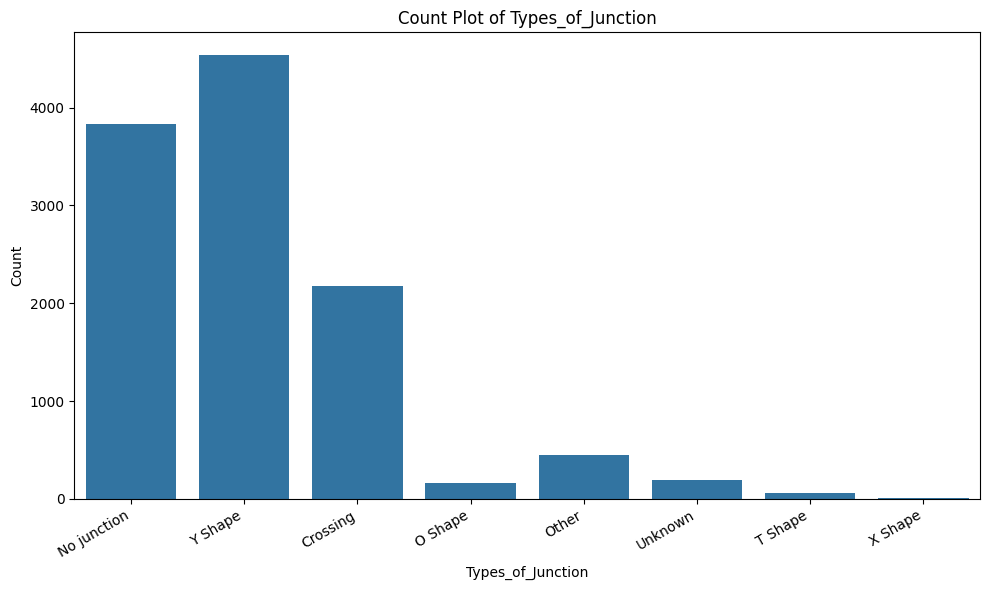

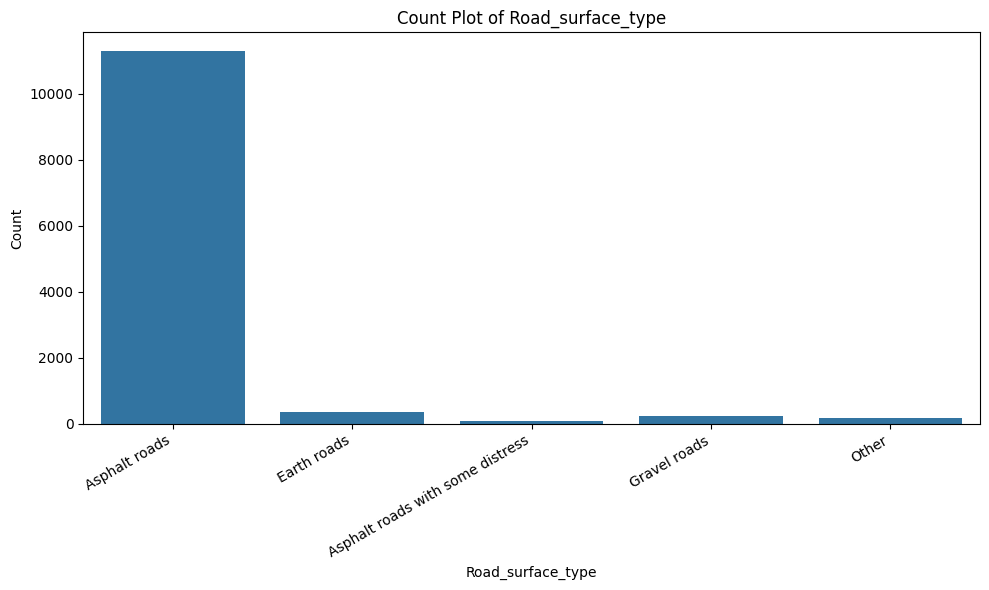

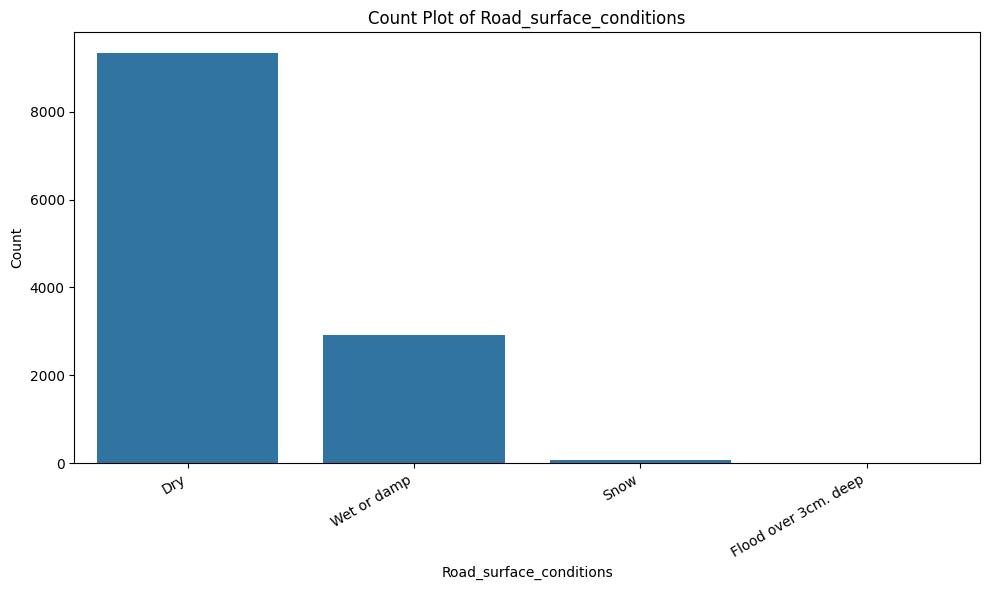

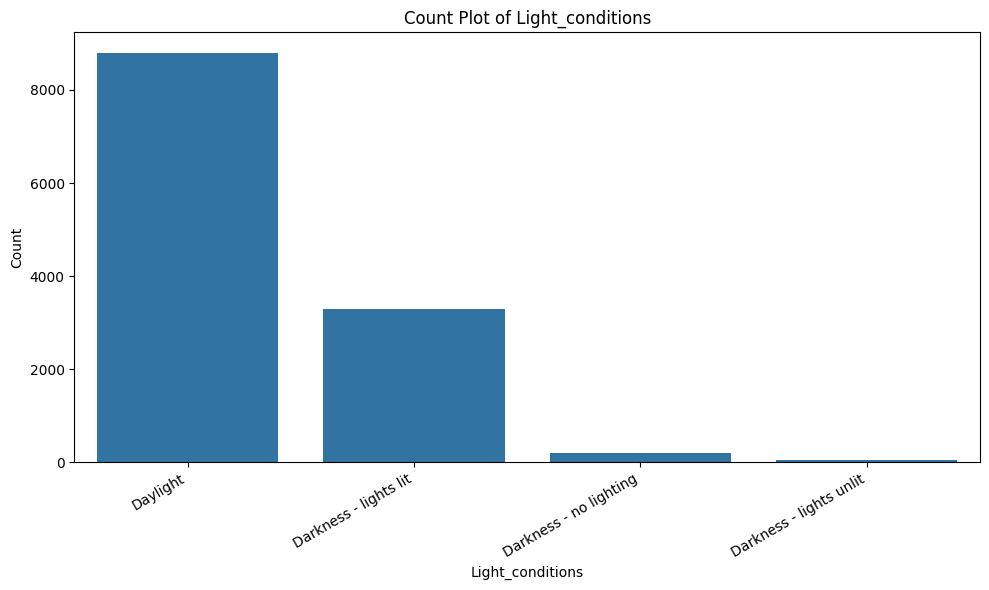

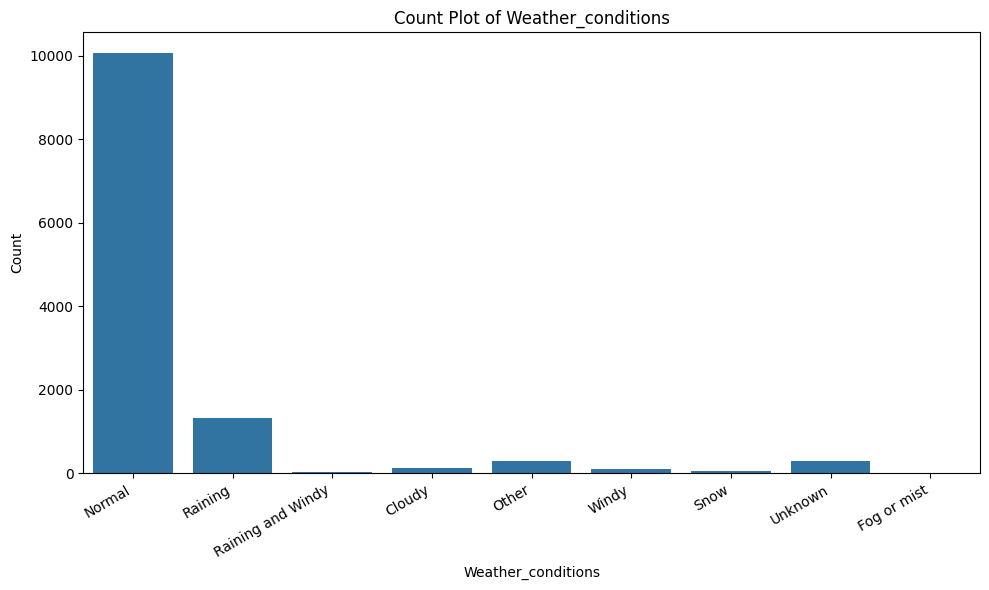

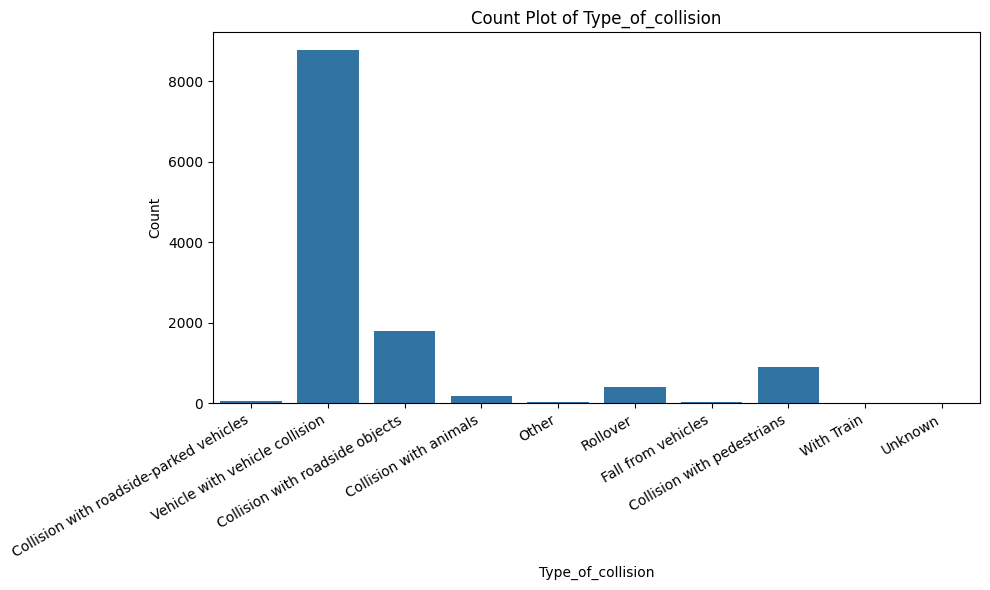

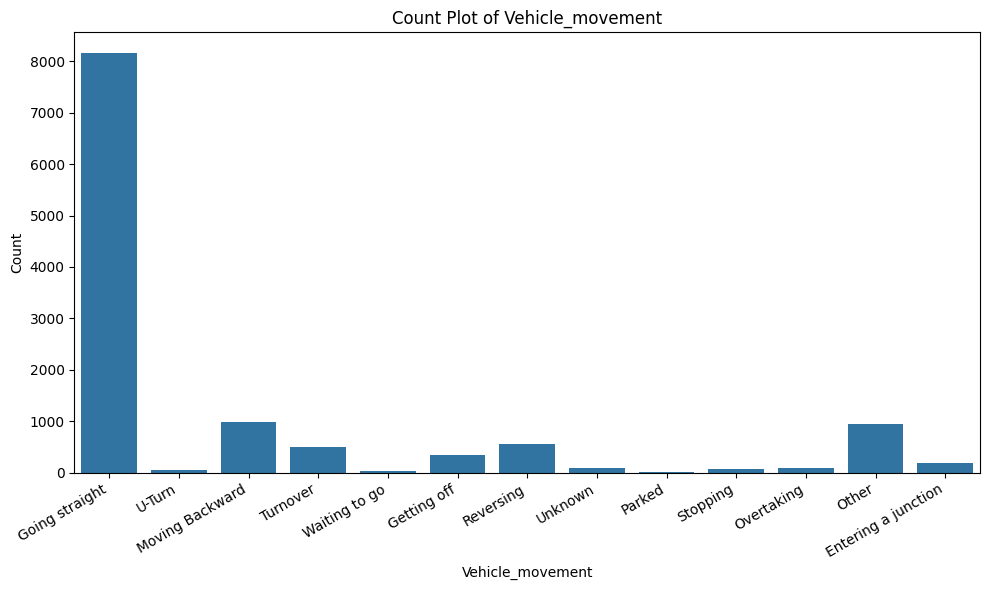

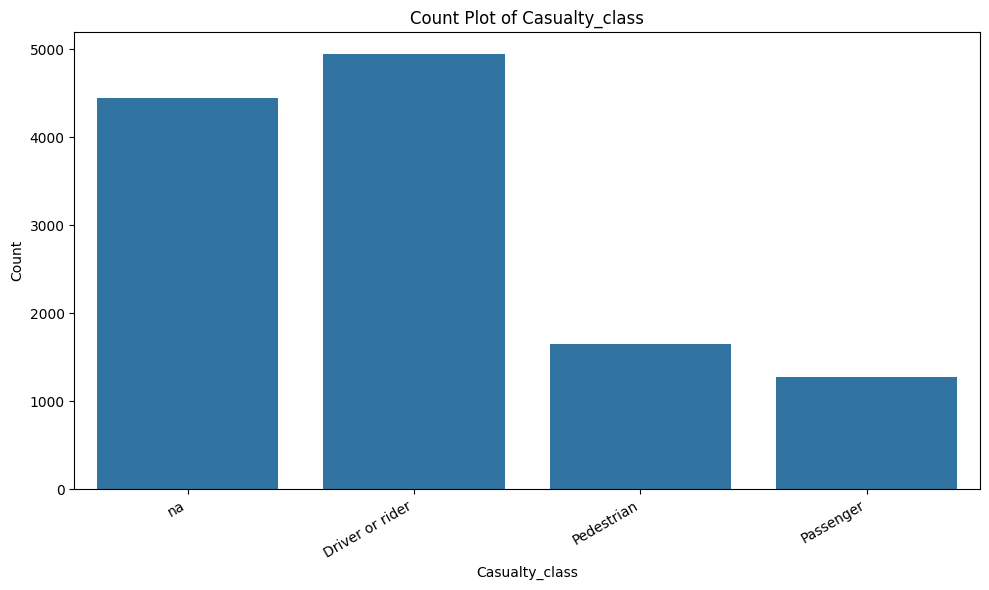

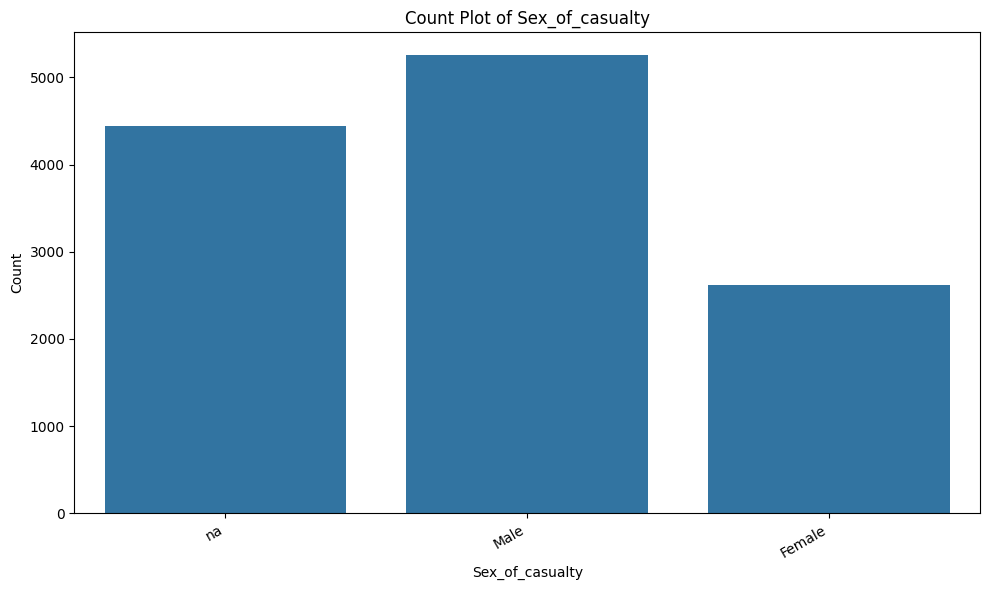

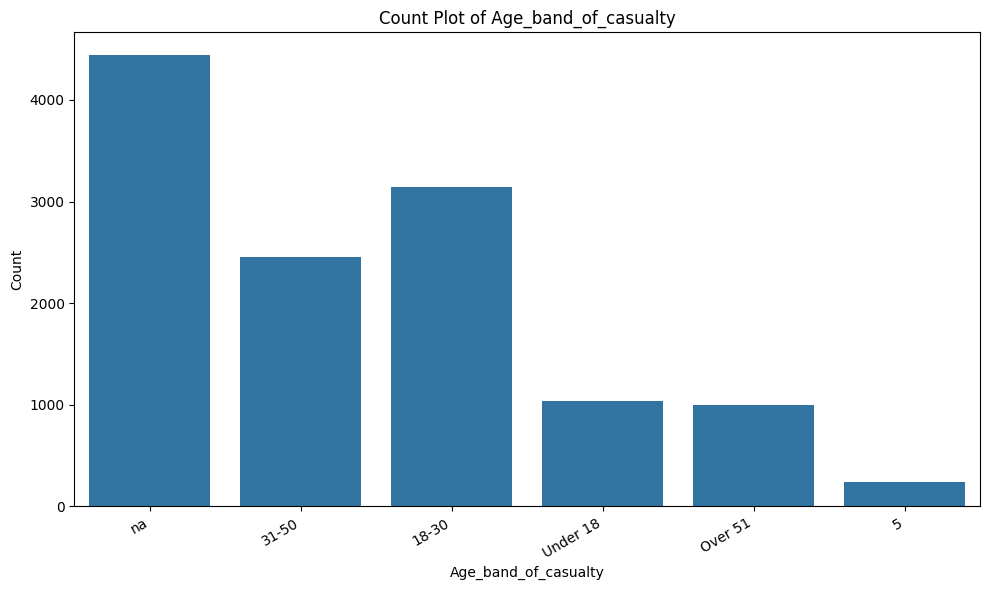

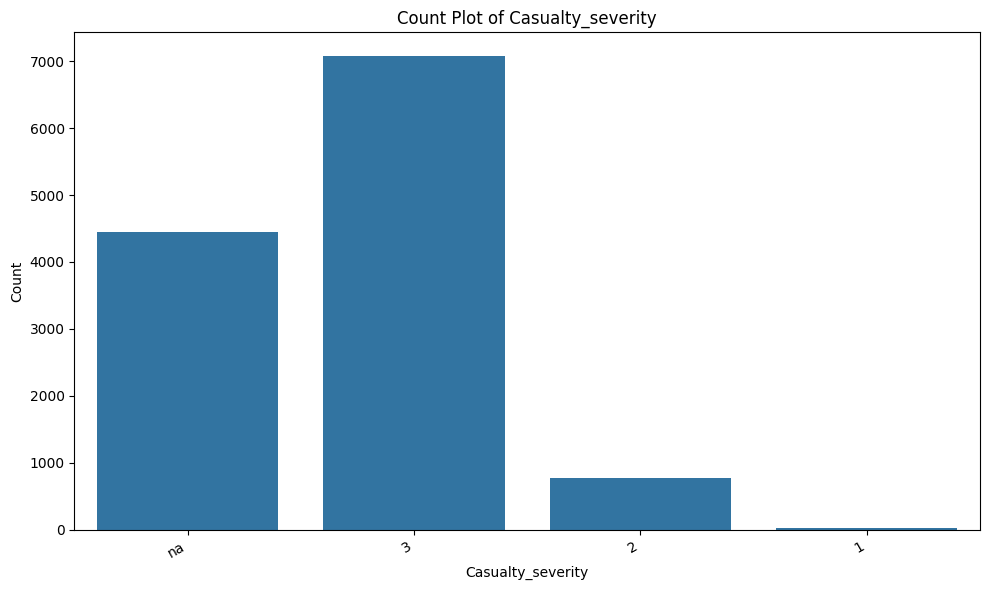

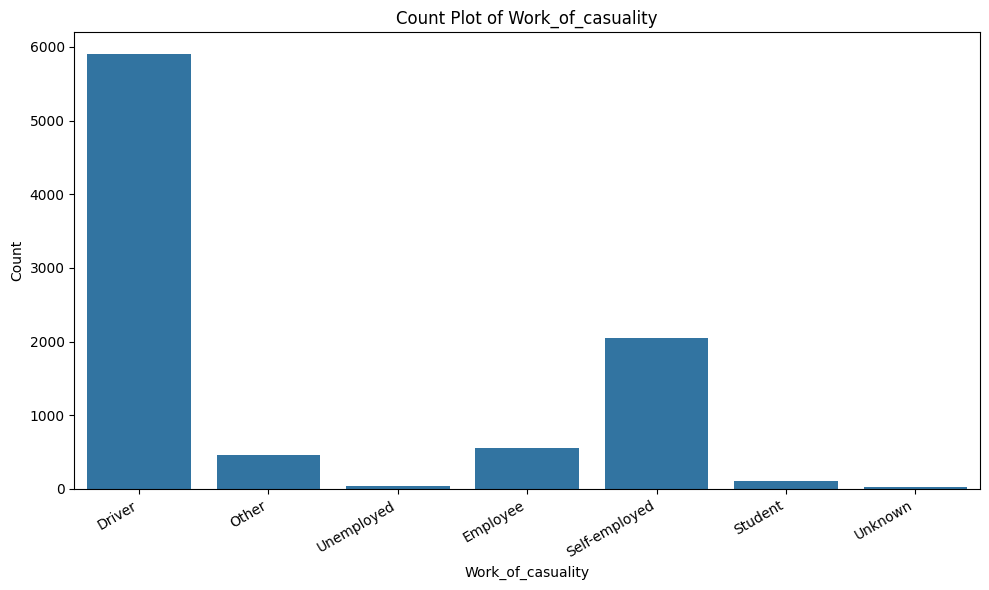

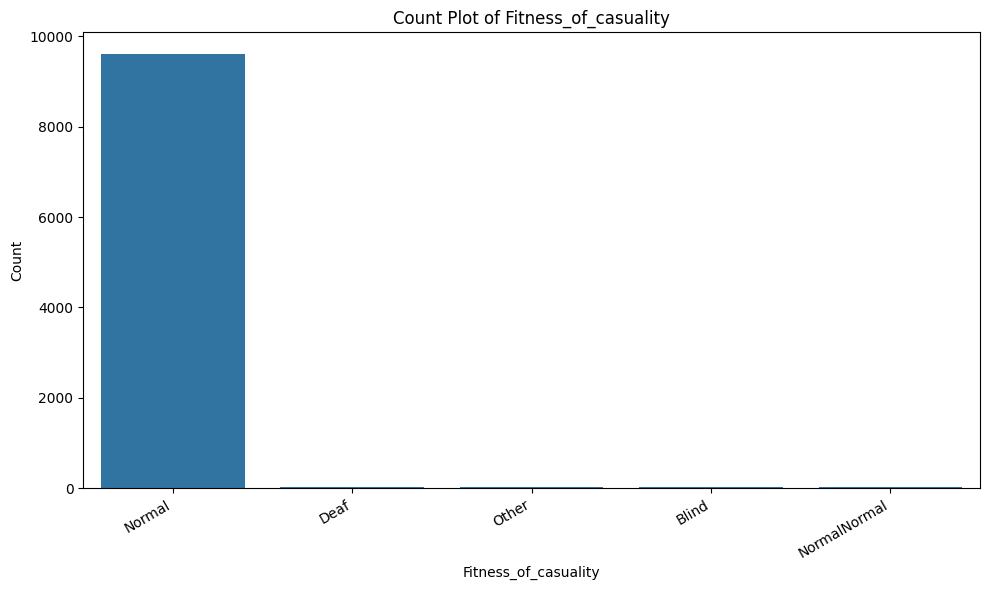

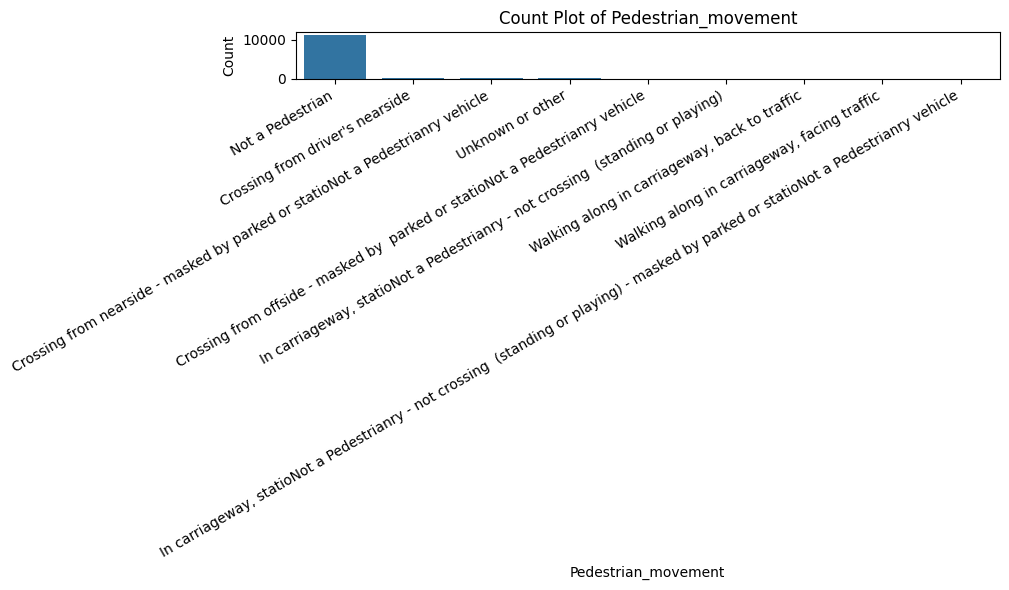

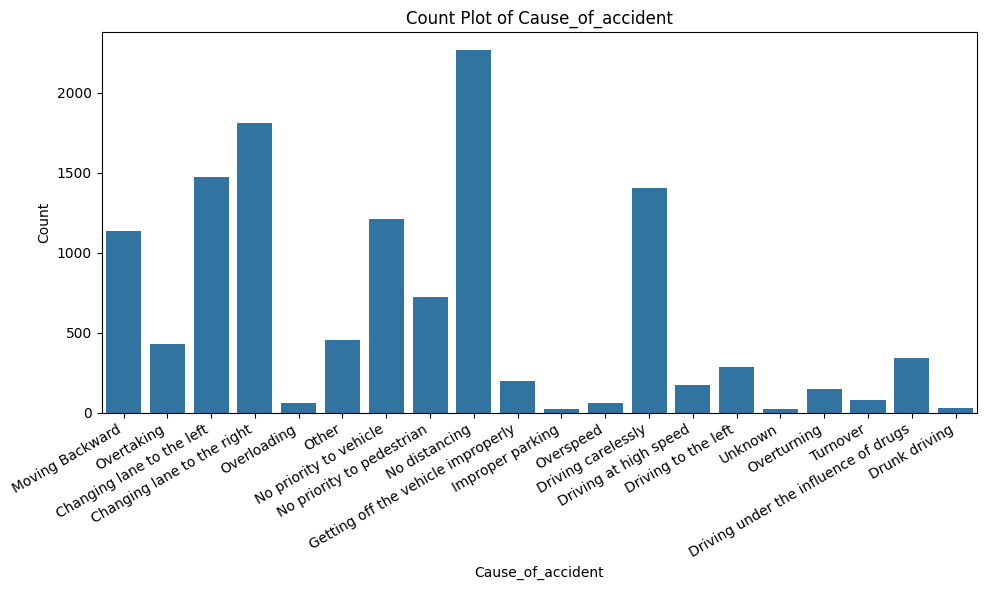

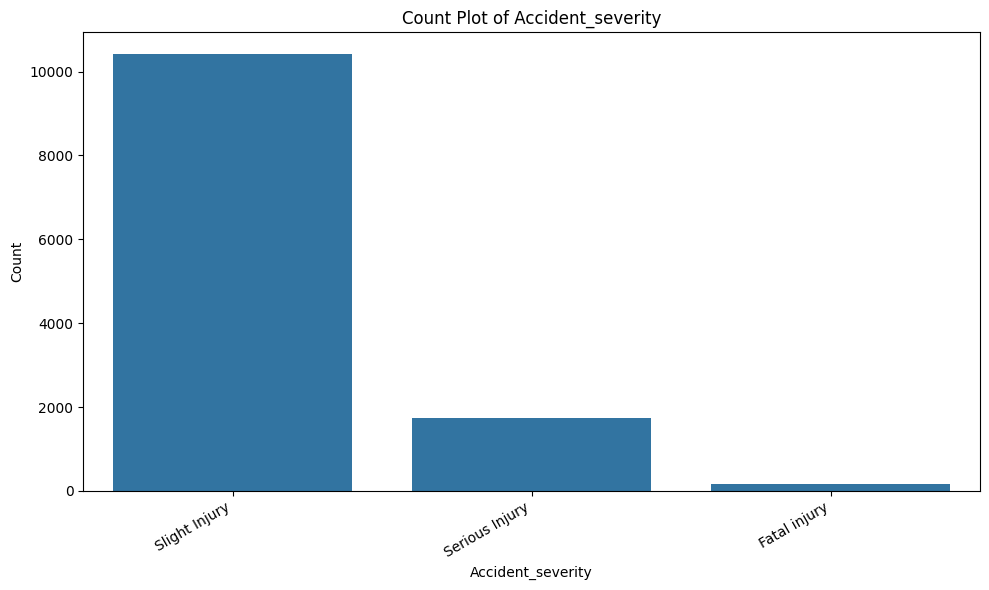

In [ ]:
import seaborn as sns

categorical_cols = df_RTA.select_dtypes(include=['object']).columns

for col in categorical_cols:
  plt.figure(figsize=(10, 6))
  sns.countplot(x=col, data=df_RTA)
  plt.title(f'Count Plot of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=30, ha='right')
  plt.tight_layout()
  plt.show()

## remove skewness of  Number_of_vehicles_involved

In [ ]:
# df_RTA['Number_of_vehicles_involved'].skew()

In [ ]:
#df_RTA['Number_of_vehicles_involved_sqrt']=np.sqrt(df_RTA['Number_of_vehicles_involved'])

In [ ]:
import numpy as np
#df_RTA['Number_of_vehicles_involved_log']=np.log(df_RTA['Number_of_vehicles_involved'])


In [ ]:
# print(df_RTA['Number_of_vehicles_involved_log'].skew())
# print(df_RTA['Number_of_vehicles_involved_sqrt'].skew())

In [ ]:
#df_RTA.drop(columns=['Number_of_vehicles_involved_log','Number_of_vehicles_involved'],inplace=True)

In [ ]:
#df_RTA['Number_of_vehicles_involved_sqrt']=df_RTA['Number_of_vehicles_involved_sqrt'].astype(int)

In [ ]:
#df_RTA['Number_of_vehicles_involved_sqrt'].unique()

## remove skewness of  Number_of_casualties

In [ ]:
df_RTA['Number_of_casualties_log']=np.log1p(df_RTA['Number_of_casualties'])
df_RTA['Number_of_casualties_sqrt']=np.sqrt(df_RTA['Number_of_casualties'])

In [ ]:
print(df_RTA['Number_of_casualties_log'].skew())
print(df_RTA['Number_of_casualties_sqrt'].skew())
print(df_RTA['Number_of_casualties'].skew())

1.568002867527554
1.7460492886929544
2.344768578239189


In [ ]:
df_RTA.drop(columns=['Number_of_casualties_sqrt','Number_of_casualties'],inplace=True)

# 4). Data cleaning:

In [ ]:
df=df_RTA.copy()

## time

In [ ]:
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Fitness_of_casuality           2635
Pedestrian_movement               0
Cause_of_accident                 0
Accident_severity                 0
Number_of_casualties_log          0
dtype: int64

In [ ]:
df.duplicated().sum()


0

In [ ]:
df

Time Day_of_week Age_band_of_driver Sex_of_driver  \
0      17:02:00      Monday              18-30          Male   
1      17:02:00      Monday              31-50          Male   
2      17:02:00      Monday              18-30          Male   
3       1:06:00      Sunday              18-30          Male   
4       1:06:00      Sunday              18-30          Male   
...         ...         ...                ...           ...   
12311  16:15:00   Wednesday              31-50          Male   
12312  18:00:00      Sunday            Unknown          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
0       Above high school                Employee              1-2yr   
1      Junior high school                Employee         Above 10yr   
2      Junior high school                Employee              1-2yr   
3      Junior high school                Employee             5-10yr   
4      Junior high school                Employee              2-5yr   
...                   ...                     ...                ...   
12311                 NaN                Employee              2-5yr   
12312   Elementary school                Employee             5-10yr   
12313  Junior high school                Employee             5-10yr   
12314  Junior high school                Employee         Above 10yr   
12315  Junior high school                Employee             5-10yr   

           Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  \
0               Automobile            Owner              Above 10yr   
1      Public (> 45 seats)            Owner                 5-10yrs   
2          Lorry (41?100Q)            Owner                     NaN   
3      Public (> 45 seats)     Governmental                     NaN   
4                      NaN            Owner                 5-10yrs   
...                    ...              ...                     ...   
12311       Lorry (11?40Q)            Owner                     NaN   
12312           Automobile            Owner                     NaN   
12313                Bajaj            Owner                  2-5yrs   
12314      Lorry (41?100Q)            Owner                  2-5yrs   
12315                Other            Owner                  2-5yrs   

      Defect_of_vehicle Area_accident_occured  \
0             No defect     Residential areas   
1             No defect          Office areas   
2             No defect    Recreational areas   
3             No defect          Office areas   
4             No defect      Industrial areas   
...                 ...                   ...   
12311         No defect   Outside rural areas   
12312         No defect   Outside rural areas   
12313         No defect   Outside rural areas   
12314         No defect          Office areas   
12315         No defect   Outside rural areas   

                                       Lanes_or_Medians  \
0                                                   NaN   
1                                     Undivided Two way   
2                                                 other   
3                                                 other   
4                                                 other   
...                                                 ...   
12311                                 Undivided Two way   
12312  Two-way (divided with broken lines road marking)   
12313  Two-way (divided with broken lines road marking)   
12314                                 Undivided Two way   
12315                                 Undivided Two way   

                                     Road_allignment Types_of_Junction  \
0                     Tangent road with flat terrain       No junction   
1                     Tangent road with flat terrain       No junction   
2   

In [ ]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df
df['Time'] = df['Time'].astype(int)

## Age_band_of_driver

In [ ]:
df['Age_band_of_driver'].isna().sum()

0

In [ ]:
df['Age_band_of_driver'].unique()

array(['18-30', '31-50', 'Under 18', 'Over 51', 'Unknown'], dtype=object)

In [ ]:
df['Age_band_of_driver'].value_counts()

Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64

In [ ]:
df['Age_band_of_driver']=df['Age_band_of_driver'].str.replace('Unknown',df['Age_band_of_driver'].mode()[0])
## Replaces 'Unknown' values in the 'Age_band_of_driver' column with the most frequent age band (mode).
df['Age_band_of_driver']=df['Age_band_of_driver'].replace('Under 18','18')
df['Age_band_of_driver']=df['Age_band_of_driver'].replace('Over 51','51')
df['Age_band_of_driver']=df['Age_band_of_driver'].replace('18-30','24')
df['Age_band_of_driver']=df['Age_band_of_driver'].replace('31-50','43')
df['Age_band_of_driver']=df['Age_band_of_driver'].astype(int)

In [ ]:
df['Age_band_of_driver'].unique()

array([24, 43, 18, 51])

## Educational_level

In [ ]:
df['Educational_level'].unique()

array(['Above high school', 'Junior high school', nan,
       'Elementary school', 'High school', 'Unknown', 'Illiterate',
       'Writing & reading'], dtype=object)

In [ ]:
df['Educational_level']=df['Educational_level'].str.replace('Unknown',df['Educational_level'].mode()[0])

In [ ]:
df['Educational_level'].value_counts()

Educational_level
Junior high school    7719
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Illiterate              45
Name: count, dtype: int64

In [ ]:
df['Educational_level'].isnull().sum()

741

In [ ]:
df['Educational_level'].fillna(df['Educational_level'].mode()[0],inplace =True)

<ipython-input-213-8b86d7fdb741>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Educational_level'].fillna(df['Educational_level'].mode()[0],inplace =True)


In [ ]:
df['Educational_level'].isnull().sum()

0

In [ ]:
df['Educational_level'].unique()

array(['Above high school', 'Junior high school', 'Elementary school',
       'High school', 'Illiterate', 'Writing & reading'], dtype=object)

## Vehicle_driver_relation

In [ ]:
df['Vehicle_driver_relation'].unique()

array(['Employee', 'Unknown', 'Owner', nan, 'Other'], dtype=object)

In [ ]:
df['Vehicle_driver_relation'].value_counts()

Vehicle_driver_relation
Employee    9627
Owner       1973
Other        123
Unknown       14
Name: count, dtype: int64

In [ ]:
df['Vehicle_driver_relation']=df['Vehicle_driver_relation'].str.replace('Unknown',df['Vehicle_driver_relation'].mode()[0])


In [ ]:
df['Vehicle_driver_relation'].value_counts()

Vehicle_driver_relation
Employee    9641
Owner       1973
Other        123
Name: count, dtype: int64

In [ ]:
df['Vehicle_driver_relation'].fillna(df['Vehicle_driver_relation'].mode()[0],inplace =True)

<ipython-input-220-1c20a4d1a6a3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Vehicle_driver_relation'].fillna(df['Vehicle_driver_relation'].mode()[0],inplace =True)


## Driving_experience

In [ ]:
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Fitness_of_casuality           2635
Pedestrian_movement               0
Cause_of_accident                 0
Accident_severity                 0
Number_of_casualties_log          0
dtype: int64

In [ ]:
df['Driving_experience'].value_counts()

Driving_experience
5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: count, dtype: int64

In [ ]:
df['Driving_experience'].unique()

array(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', nan, 'No Licence',
       'Below 1yr', 'unknown'], dtype=object)

In [ ]:
df['Driving_experience'].fillna(df['Driving_experience'].mode()[0],inplace =True)
df['Driving_experience']=df['Driving_experience'].str.replace('unknown',df['Driving_experience'].mode()[0])


<ipython-input-224-408b1c71436d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Driving_experience'].fillna(df['Driving_experience'].mode()[0],inplace =True)


In [ ]:
df['Driving_experience']=df['Driving_experience'].str.replace('1-2yr','1.5')
df['Driving_experience']=df['Driving_experience'].str.replace('Above 10yr','10')
df['Driving_experience']=df['Driving_experience'].str.replace('5-10yr','7.5')
df['Driving_experience']=df['Driving_experience'].str.replace('2-5yr','3.5')
df['Driving_experience']=df['Driving_experience'].str.replace('No Licence','0')
df['Driving_experience']=df['Driving_experience'].str.replace('Below 1yr','1')
df['Driving_experience']=df['Driving_experience'].astype(float)

In [ ]:
s=df['Driving_experience'].mode()[0]
df['Driving_experience']=df['Driving_experience'].replace('unknown',s)

In [ ]:
df['Driving_experience'].mode()[0]

7.5

In [ ]:
df['Driving_experience'].unique()

array([ 1.5, 10. ,  7.5,  3.5,  0. ,  1. ])

In [ ]:
df['Driving_experience'].isna().sum()

0

In [ ]:
df['Driving_experience'].fillna(df['Driving_experience'].mode()[0],inplace =True)

<ipython-input-230-7893109cba38>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Driving_experience'].fillna(df['Driving_experience'].mode()[0],inplace =True)


## Type_of_vehicle

In [ ]:
df['Type_of_vehicle'].unique()

array(['Automobile', 'Public (> 45 seats)', 'Lorry (41?100Q)', nan,
       'Public (13?45 seats)', 'Lorry (11?40Q)', 'Long lorry',
       'Public (12 seats)', 'Taxi', 'Pick up upto 10Q', 'Stationwagen',
       'Ridden horse', 'Other', 'Bajaj', 'Turbo', 'Motorcycle',
       'Special vehicle', 'Bicycle'], dtype=object)

In [ ]:
df['Type_of_vehicle'].value_counts()

Type_of_vehicle
Automobile              3205
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj                     29
Bicycle                   21
Name: count, dtype: int64

In [ ]:
df['Type_of_vehicle']=df['Type_of_vehicle'].str.replace('Public (> 45 seats)','public')
df['Type_of_vehicle']=df['Type_of_vehicle'].str.replace('Public (13?45 seats)','public')
df['Type_of_vehicle']=df['Type_of_vehicle'].str.replace('Public (12 seats)','public')
df['Type_of_vehicle']=df['Type_of_vehicle'].str.replace('Lorry (11?40Q)','lorry')
df['Type_of_vehicle']=df['Type_of_vehicle'].str.replace('Lorry (41?100Q)','lorry')

In [ ]:
df['Type_of_vehicle'].value_counts()

Type_of_vehicle
Automobile          3205
lorry               2727
public              1647
Other               1208
Pick up upto 10Q     811
Stationwagen         687
Long lorry           383
Taxi                 265
Motorcycle           177
Special vehicle       84
Ridden horse          76
Turbo                 46
Bajaj                 29
Bicycle               21
Name: count, dtype: int64

In [ ]:
df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0],inplace =True)

<ipython-input-235-66a22c213472>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0],inplace =True)


## Owner_of_vehicle

In [ ]:
df['Owner_of_vehicle'].unique()

array(['Owner', 'Governmental', nan, 'Organization', 'Other'],
      dtype=object)

In [ ]:
df['Owner_of_vehicle'].isna().sum()

482

In [ ]:
df['Owner_of_vehicle'].fillna(df['Owner_of_vehicle'].mode()[0],inplace =True)

<ipython-input-238-4c93e049a04e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Owner_of_vehicle'].fillna(df['Owner_of_vehicle'].mode()[0],inplace =True)


In [ ]:
df['Owner_of_vehicle'].isna().sum()

0

In [ ]:
df['Owner_of_vehicle'].value_counts()

Owner_of_vehicle
Owner           10941
Governmental     1041
Organization      312
Other              22
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Fitness_of_casuality           2635
Pedestrian_movement               0
Cause_of_accident                 0
Accident_severity                 0
Number_of_casualties_log          0
dtype: int64

## Service_year_of_vehicle

In [ ]:
df['Service_year_of_vehicle'].unique()

array(['Above 10yr', '5-10yrs', nan, '1-2yr', '2-5yrs', 'Unknown',
       'Below 1yr'], dtype=object)

In [ ]:
df['Service_year_of_vehicle'].value_counts()

Service_year_of_vehicle
Unknown       2883
2-5yrs        1792
Above 10yr    1324
5-10yrs       1280
1-2yr          827
Below 1yr      282
Name: count, dtype: int64

In [ ]:
df['Service_year_of_vehicle'].isna().sum()

3928

In [ ]:
df['Service_year_of_vehicle']=df['Service_year_of_vehicle'].replace('1-2yr','1.5')
df['Service_year_of_vehicle']=df['Service_year_of_vehicle'].replace('Above 10yr','10')
df['Service_year_of_vehicle']=df['Service_year_of_vehicle'].replace('5-10yrs','7.5')
df['Service_year_of_vehicle']=df['Service_year_of_vehicle'].replace('2-5yrs','3.5')
df['Service_year_of_vehicle']=df['Service_year_of_vehicle'].replace('Below 1yr','1')


In [ ]:
df['Service_year_of_vehicle']=df['Service_year_of_vehicle'].replace('Unknown',None)

In [ ]:
df.dropna(subset=['Service_year_of_vehicle'],inplace=True)

In [ ]:
df['Service_year_of_vehicle'].mode()[0]

'3.5'

In [ ]:
df['Service_year_of_vehicle'].value_counts()

Service_year_of_vehicle
3.5    1792
10     1324
7.5    1280
1.5     827
1       282
Name: count, dtype: int64

In [ ]:
df['Service_year_of_vehicle'].unique()

array(['10', '7.5', '1.5', '3.5', '1'], dtype=object)

In [ ]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Service_year_of_vehicle           0
Defect_of_vehicle              2003
Area_accident_occured            50
Lanes_or_Medians                 91
Road_allignment                  50
Types_of_Junction               398
Road_surface_type                72
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision                75
Number_of_vehicles_involved       0
Vehicle_movement                143
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              1473
Fitness_of_casuality           1197
Pedestrian_movement               0
Cause_of_accident                 0
Accident_severity                 0
Number_of_casualties_log          0
dtype: int64

## Defect_of_vehicle

In [ ]:
df['Defect_of_vehicle'].unique()

array(['No defect', nan, '5', '7'], dtype=object)

In [ ]:
df['Defect_of_vehicle'].value_counts()

Defect_of_vehicle
No defect    3451
5              36
7              15
Name: count, dtype: int64

In [ ]:
df['Defect_of_vehicle']=df['Defect_of_vehicle'].str.replace('No defect','0')

In [ ]:
df['Defect_of_vehicle'].isna().sum()


2003

In [ ]:
df['Defect_of_vehicle'].fillna(df['Defect_of_vehicle'].mode()[0],inplace=True)
df['Defect_of_vehicle']=df['Defect_of_vehicle'].astype(int)

<ipython-input-256-eb88c9abfb01>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Defect_of_vehicle'].fillna(df['Defect_of_vehicle'].mode()[0],inplace=True)


In [ ]:
df['Defect_of_vehicle'].isna().sum()


0

In [ ]:
df['Defect_of_vehicle'].unique()

array([0, 5, 7])

## Area_accident_occured

In [ ]:
df['Area_accident_occured'].unique()

array(['Residential areas', 'Office areas', ' Industrial areas',
       ' Church areas', '  Market areas', 'Other', 'Rural village areas',
       ' Hospital areas', 'School areas', nan, '  Recreational areas',
       ' Outside rural areas', 'Recreational areas'], dtype=object)

In [ ]:
df['Area_accident_occured'].value_counts()

Area_accident_occured
Other                   1778
Office areas            1188
Residential areas       1106
 Church areas            548
 Industrial areas        237
School areas             192
 Outside rural areas     127
 Hospital areas          107
  Recreational areas      90
Rural village areas       44
  Market areas            37
Recreational areas         1
Name: count, dtype: int64

In [ ]:
df['Area_accident_occured']=df['Area_accident_occured'].str.replace('Unknown',df['Area_accident_occured'].mode()[0])
df['Area_accident_occured'].fillna(df['Area_accident_occured'].mode()[0],inplace=True)


<ipython-input-261-e06e90409468>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Area_accident_occured'].fillna(df['Area_accident_occured'].mode()[0],inplace=True)


In [ ]:
df['Area_accident_occured']=df['Area_accident_occured'].str.replace('  Recreational areas','Recreational areas')

In [ ]:
df['Area_accident_occured'].value_counts()

Area_accident_occured
Other                   1828
Office areas            1188
Residential areas       1106
 Church areas            548
 Industrial areas        237
School areas             192
 Outside rural areas     127
 Hospital areas          107
Recreational areas        91
Rural village areas       44
  Market areas            37
Name: count, dtype: int64

## Lanes_or_Medians

In [ ]:
df['Lanes_or_Medians'].unique()

array([nan, 'Undivided Two way', 'other', 'Double carriageway (median)',
       'One way', 'Two-way (divided with broken lines road marking)',
       'Unknown'], dtype=object)

In [ ]:
df['Lanes_or_Medians'].value_counts()

Lanes_or_Medians
Two-way (divided with broken lines road marking)    1946
Undivided Two way                                   1945
other                                                840
Double carriageway (median)                          343
One way                                              321
Unknown                                               19
Name: count, dtype: int64

In [ ]:
df['Lanes_or_Medians']=df['Lanes_or_Medians'].str.replace('Unknown',df['Lanes_or_Medians'].mode()[0])
df['Lanes_or_Medians']=df['Lanes_or_Medians'].str.replace('Double carriageway (median)','Double carriageway')
df['Lanes_or_Medians']=df['Lanes_or_Medians'].str.replace('Two-way (divided with broken lines road marking)','Two way')
df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode()[0],inplace=True)

<ipython-input-266-0e62d8e8d558>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode()[0],inplace=True)


In [ ]:
df['Lanes_or_Medians'].value_counts()

Lanes_or_Medians
Two way               2056
Undivided Two way     1945
other                  840
Double carriageway     343
One way                321
Name: count, dtype: int64

## Road_allignment

In [ ]:
df['Road_allignment'].unique()

array(['Tangent road with flat terrain', 'Escarpments',
       'Tangent road with rolling terrain', 'Gentle horizontal curve',
       'Tangent road with mountainous terrain and',
       'Tangent road with mild grade and flat terrain', nan,
       'Steep grade downward with mountainous terrain',
       'Sharp reverse curve',
       'Steep grade upward with mountainous terrain'], dtype=object)

In [ ]:
df.dropna(subset=['Road_allignment'],inplace=True)

In [ ]:
df['Road_allignment'].isna().sum()

0

## Types_of_Junction

In [ ]:
df['Types_of_Junction'].unique()

array(['No junction', 'Y Shape', 'Crossing', 'O Shape', 'Other',
       'Unknown', 'T Shape', 'X Shape', nan], dtype=object)

In [ ]:
df['Types_of_Junction'].isna().sum()

395

In [ ]:
df['Types_of_Junction'].fillna(df['Types_of_Junction'].mode()[0],inplace=True)
df['Types_of_Junction'] = df['Types_of_Junction'].str.replace('Unknown', df['Types_of_Junction'].mode()[0])

<ipython-input-273-92da82503ba4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Types_of_Junction'].fillna(df['Types_of_Junction'].mode()[0],inplace=True)


## Road_surface_type

In [ ]:
df['Road_surface_type'].unique()

array(['Asphalt roads', 'Earth roads', nan, 'Gravel roads', 'Other',
       'Asphalt roads with some distress'], dtype=object)

In [ ]:
df.dropna(subset=['Road_surface_type'],inplace=True)

In [ ]:
df['Road_surface_type'].isna().sum()

0

In [ ]:
df['Road_surface_type'] =df['Road_surface_type'].str.replace('Unknown', df['Road_surface_type'].mode()[0])

In [ ]:
df['Road_surface_type'].value_counts()

Road_surface_type
Asphalt roads                       5010
Earth roads                          154
Gravel roads                          97
Other                                 76
Asphalt roads with some distress      46
Name: count, dtype: int64

In [ ]:
df['Road_surface_conditions'].unique()

array(['Dry', 'Wet or damp', 'Snow'], dtype=object)

In [ ]:
df['Road_surface_conditions'] =df['Road_surface_conditions'].replace('Wet or damp','wet')

In [ ]:
df['Road_surface_conditions'].unique()

array(['Dry', 'wet', 'Snow'], dtype=object)

## Weather_conditions

In [ ]:
df['Weather_conditions'].unique()

array(['Normal', 'Raining', 'Windy', 'Other', 'Cloudy', 'Snow',
       'Fog or mist', 'Unknown', 'Raining and Windy'], dtype=object)

In [ ]:
df['Weather_conditions']=df['Weather_conditions'].str.replace('Unknown',df['Weather_conditions'].mode()[0])

## Type_of_collision

In [ ]:
df['Type_of_collision'].unique()

array(['Collision with roadside-parked vehicles',
       'Vehicle with vehicle collision', 'Collision with animals',
       'Rollover', 'Fall from vehicles', 'Collision with pedestrians',
       'Collision with roadside objects', 'Unknown', nan, 'Other',
       'With Train'], dtype=object)

In [ ]:
df['Type_of_collision']=df['Type_of_collision'].str.replace('Unknown',df['Type_of_collision'].mode()[0])
df['Type_of_collision'].fillna(df['Type_of_collision'].mode()[0],inplace=True)

<ipython-input-285-6a9ac9265b45>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type_of_collision'].fillna(df['Type_of_collision'].mode()[0],inplace=True)


In [ ]:
print(df['Type_of_collision'].mode()[0])
print(df['Type_of_collision'].isna().sum())

Vehicle with vehicle collision
0


## Pedestrian_movement

In [ ]:
df['Pedestrian_movement'].unique()

array(['Not a Pedestrian', "Crossing from driver's nearside",
       'Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle',
       'Unknown or other',
       'Walking along in carriageway, back to traffic',
       'Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle',
       'Walking along in carriageway, facing traffic',
       'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)',
       'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle'],
      dtype=object)

In [ ]:
df['Pedestrian_movement'].value_counts()

Pedestrian_movement
Not a Pedestrian                                                                                                                         4987
Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle                                                             147
Unknown or other                                                                                                                          122
Crossing from driver's nearside                                                                                                            63
Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle                                                              27
In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)                                                             20
Walking along in carriageway, back to traffic                                                                                              10
In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle       4
Walking along in carriageway, facing traffic                                                                                                3
Name: count, dtype: int64

In [ ]:
df['Pedestrian_movement']=df['Pedestrian_movement'].str.replace('Unknown or other','other')

## Vehicle_movement

In [ ]:
df['Vehicle_movement'].unique()

array(['Going straight', 'U-Turn', 'Waiting to go', 'Moving Backward',
       'Reversing', 'Turnover', 'Unknown', 'Stopping', 'Overtaking',
       'Getting off', 'Other', 'Parked', nan, 'Entering a junction'],
      dtype=object)

In [ ]:
df['Vehicle_movement'].isnull().sum()

139

In [ ]:
df['Vehicle_movement'].fillna(df['Vehicle_movement'].mode()[0],inplace=True)

<ipython-input-292-93d58a318b5a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Vehicle_movement'].fillna(df['Vehicle_movement'].mode()[0],inplace=True)


In [ ]:
df['Vehicle_movement'].isnull().sum()

0

In [ ]:
df['Vehicle_movement']=df["Vehicle_movement"].replace('Unknown',df['Vehicle_movement'].mode()[0])

In [ ]:
df['Vehicle_movement'].value_counts()

Vehicle_movement
Going straight         3705
Other                   438
Moving Backward         422
Reversing               263
Turnover                216
Getting off             149
Entering a junction      89
Overtaking               43
Stopping                 23
U-Turn                   19
Waiting to go            12
Parked                    4
Name: count, dtype: int64

## Casualty_class

In [ ]:
df['Casualty_class'].unique()

array(['na', 'Pedestrian', 'Passenger', 'Driver or rider'], dtype=object)

In [ ]:
df.head(10)

Time Day_of_week  Age_band_of_driver Sex_of_driver   Educational_level  \
0     17      Monday                  24          Male   Above high school   
1     17      Monday                  43          Male  Junior high school   
4      1      Sunday                  24          Male  Junior high school   
7     17      Friday                  24          Male  Junior high school   
8     17      Friday                  24          Male  Junior high school   
9     17      Friday                  24          Male  Junior high school   
12    17    Thursday                  24          Male  Junior high school   
13    17    Thursday                  43          Male  Junior high school   
14    17    Thursday                  43          Male  Junior high school   
18    22      Monday                  24          Male  Junior high school   

   Vehicle_driver_relation  Driving_experience Type_of_vehicle  \
0                 Employee                 1.5      Automobile   
1                 Employee                10.0          public   
4                 Employee                 3.5      Automobile   
7                 Employee                 3.5      Automobile   
8                 Employee                10.0           lorry   
9                 Employee                 1.5      Automobile   
12                Employee                 1.5          public   
13                Employee                 7.5           lorry   
14                Employee                10.0      Automobile   
18                Employee                 3.5      Automobile   

   Owner_of_vehicle Service_year_of_vehicle  Defect_of_vehicle  \
0             Owner                      10                  0   
1             Owner                     7.5                  0   
4             Owner                     7.5                  0   
7      Governmental                      10                  0   
8             Owner                     1.5                  0   
9             Owner                     3.5                  0   
12            Owner                     3.5                  0   
13            Owner                      10                  0   
14            Owner                     1.5                  0   
18            Owner                      10                  0   

   Area_accident_occured    Lanes_or_Medians                 Road_allignment  \
0      Residential areas             Two way  Tangent road with flat terrain   
1           Office areas   Undivided Two way  Tangent road with flat terrain   
4       Industrial areas               other  Tangent road with flat terrain   
7      Residential areas               other  Tangent road with flat terrain   
8       Industrial areas               other  Tangent road with flat terrain   
9      Residential areas   Undivided Two way  Tangent road with flat terrain   
12          Office areas  Double carriageway                     Escarpments   
13          Office areas               other  Tangent road with flat terrain   
14          Office areas   Undivided Two way                     Escarpments   
18     Residential areas               other  Tangent road with flat terrain   

   Types_of_Junction Road_surface_type Road_surface_conditions  \
0        No junction     Asphalt roads                     Dry   
1        No junction     Asphalt roads                     Dry   
4            Y Shape     Asphalt roads                     Dry   
7            Y Shape     Asphalt roads                     Dry   
8            Y Shape       Earth roads                     Dry   
9            Y Shape     Asphalt roads                     Dry   
12       No junction     Asphalt roads                     Dry   
13       No junction     Asphalt roads                     Dry   
14       No junction     Asphalt roads                     Dry   
18           Y Shape     Asphalt roads                     wet   

         Light_conditions Weather_conditions  \
0                Daylight          

In [ ]:
df['Casualty_class']=df['Casualty_class'].replace('na',df['Casualty_class'].mode()[0])

## Sex_of_casualty

In [ ]:
df['Sex_of_casualty'].unique()

array(['na', 'Male', 'Female'], dtype=object)

In [ ]:
df['Sex_of_casualty']=df['Sex_of_casualty'].replace('na',df['Sex_of_casualty'].mode()[0])

In [ ]:
df['Sex_of_casualty'].value_counts()

Sex_of_casualty
Male      4230
Female    1153
Name: count, dtype: int64

## Age_band_of_casualty

In [ ]:
df['Age_band_of_casualty'].unique()

array(['na', 'Under 18', '18-30', '31-50', 'Over 51', '5'], dtype=object)

In [ ]:
df['Age_band_of_casualty'].mode()[0]

'na'

In [ ]:
df['Age_band_of_casualty']=df['Age_band_of_casualty'].replace('na','18-30')
df['Age_band_of_casualty']=df['Age_band_of_casualty'].replace('Under 18','18')

df['Age_band_of_casualty']=df['Age_band_of_casualty'].replace('5','18-30')

df['Age_band_of_casualty']=df['Age_band_of_casualty'].replace('Over 51','51')


In [ ]:
df['Age_band_of_casualty'].unique()

array(['18-30', '18', '31-50', '51'], dtype=object)

## Casualty_severity

In [ ]:
df['Casualty_severity'].unique()

array(['na', '3', '2', '1'], dtype=object)

In [ ]:
df['Casualty_severity'].mode()[0]

'3'

In [ ]:
df['Casualty_severity']=df['Casualty_severity'].replace('na',df['Casualty_severity'].mode()[0])
df['Casualty_severity']=df['Casualty_severity'].astype(float)

In [ ]:
df['Casualty_severity'].value_counts()

Casualty_severity
3.0    5034
2.0     336
1.0      13
Name: count, dtype: int64

## Work_of_casuality

In [ ]:
df['Work_of_casuality'].unique()

array([nan, 'Driver', 'Other', 'Unemployed', 'Self-employed', 'Employee',
       'Student', 'Unknown'], dtype=object)

In [ ]:
df['Work_of_casuality'].mode()[0]

'Driver'

In [ ]:
df['Work_of_casuality']=df['Work_of_casuality'].replace('Unknown',df['Work_of_casuality'].mode()[0])
df['Work_of_casuality'].fillna(df['Work_of_casuality'].mode()[0],inplace=True)

<ipython-input-312-662f1324673b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Work_of_casuality'].fillna(df['Work_of_casuality'].mode()[0],inplace=True)


In [ ]:
df['Work_of_casuality'].value_counts()

Work_of_casuality
Driver           3993
Self-employed     872
Employee          242
Other             213
Student            48
Unemployed         15
Name: count, dtype: int64

## Fitness_of_casuality

In [ ]:
df['Fitness_of_casuality'].unique()

array([nan, 'Normal', 'Deaf', 'Other', 'Blind', 'NormalNormal'],
      dtype=object)

In [ ]:
df['Fitness_of_casuality'].fillna(df['Fitness_of_casuality'].mode()[0],inplace=True)

<ipython-input-315-613500ee95d2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fitness_of_casuality'].fillna(df['Fitness_of_casuality'].mode()[0],inplace=True)


In [ ]:
df['Fitness_of_casuality'].value_counts()

Fitness_of_casuality
Normal          5352
Deaf              12
Other              7
Blind              7
NormalNormal       5
Name: count, dtype: int64

In [ ]:
df['Fitness_of_casuality']=df['Fitness_of_casuality'].replace('NormalNormal','Normal')

In [ ]:
df['Fitness_of_casuality'].value_counts()

Fitness_of_casuality
Normal    5357
Deaf        12
Other        7
Blind        7
Name: count, dtype: int64

In [ ]:
df["Casualty_severity"].unique()

array([3., 2., 1.])

# remove outliers

In [ ]:
df1=df.copy()
df1

Time Day_of_week  Age_band_of_driver Sex_of_driver   Educational_level  \
0        17      Monday                  24          Male   Above high school   
1        17      Monday                  43          Male  Junior high school   
4         1      Sunday                  24          Male  Junior high school   
7        17      Friday                  24          Male  Junior high school   
8        17      Friday                  24          Male  Junior high school   
...     ...         ...                 ...           ...                 ...   
12307    17      Friday                  43          Male  Junior high school   
12310     9      Friday                  24          Male  Junior high school   
12313    13      Sunday                  51          Male  Junior high school   
12314    13      Sunday                  24        Female  Junior high school   
12315    13      Sunday                  24          Male  Junior high school   

      Vehicle_driver_relation  Driving_experience   Type_of_vehicle  \
0                    Employee                 1.5        Automobile   
1                    Employee                10.0            public   
4                    Employee                 3.5        Automobile   
7                    Employee                 3.5        Automobile   
8                    Employee                10.0             lorry   
...                       ...                 ...               ...   
12307                Employee                10.0  Pick up upto 10Q   
12310                Employee                 7.5   Special vehicle   
12313                Employee                 7.5             Bajaj   
12314                Employee                10.0             lorry   
12315                Employee                 7.5             Other   

      Owner_of_vehicle Service_year_of_vehicle  Defect_of_vehicle  \
0                Owner                      10                  0   
1                Owner                     7.5                  0   
4                Owner                     7.5                  0   
7         Governmental                      10                  0   
8                Owner                     1.5                  0   
...                ...                     ...                ...   
12307     Governmental                       1                  0   
12310            Owner                      10                  0   
12313            Owner                     3.5                  0   
12314            Owner                     3.5                  0   
12315            Owner                     3.5                  0   

      Area_accident_occured   Lanes_or_Medians  \
0         Residential areas            Two way   
1              Office areas  Undivided Two way   
4          Industrial areas              other   
7         Residential areas              other   
8          Industrial areas              other   
...                     ...                ...   
12307   Outside rural areas  Undivided Two way   
12310   Outside rural areas            Two way   
12313   Outside rural areas            Two way   
12314          Office areas  Undivided Two way   
12315   Outside rural areas  Undivided Two way   

                                 Road_allignment Types_of_Junction  \
0                 Tangent road with flat terrain       No junction   
1                 Tangent road with flat terrain       No junction   
4                 Tangent road with flat terrain           Y Shape   
7                 Tangent road with flat terrain           Y Shape   
8                 Tangent road with flat terrain           Y Shape   
...                                          ...               ...   
12307             Tangent road with flat terrain             Other   
12310             Tangent road with flat terrain       No junction   
12313  Tangent road with mountainous terrain and       No junction   
12314  Tangent road with mountainous terrain and   

In [ ]:
# numerical_cols = df1.select_dtypes(include=['int64', 'float64']).columns
# print(numerical_cols)

In [ ]:
# def outlier(data):
#   Q1=data.quantile(0.25)
#   Q3=data.quantile(0.75)
#   IQR=Q3-Q1
#   lower_bound=Q1-1.5*IQR
#   upper_bound=Q3+1.5*IQR
#   outliers=data[(data<lower_bound)|(data>upper_bound)]
#   return outliers

In [ ]:
# outliers=df1[numerical_cols].apply(outlier)
# print(outliers.sum())

In [ ]:
# outliers = outliers.reindex(df1.index)
# df1=df1[~outliers.any(axis=1)]


In [ ]:
print(df.shape)
print(df1.shape)

(5383, 32)
(5383, 32)


In [ ]:
df1["Casualty_severity"].unique()

array([3., 2., 1.])

# Z-score

In [ ]:
# from scipy.stats import zscore


In [ ]:
# num=df1.select_dtypes(include=['int64', 'float64']).columns
# z_score=zscore(df1[num])

In [ ]:
# outliers = outliers.reindex(df1.index)
# df1=df1[~outliers.any(axis=1)]

# Feature engineering

In [ ]:
df1.head(5)

Time Day_of_week  Age_band_of_driver Sex_of_driver   Educational_level  \
0    17      Monday                  24          Male   Above high school   
1    17      Monday                  43          Male  Junior high school   
4     1      Sunday                  24          Male  Junior high school   
7    17      Friday                  24          Male  Junior high school   
8    17      Friday                  24          Male  Junior high school   

  Vehicle_driver_relation  Driving_experience Type_of_vehicle  \
0                Employee                 1.5      Automobile   
1                Employee                10.0          public   
4                Employee                 3.5      Automobile   
7                Employee                 3.5      Automobile   
8                Employee                10.0           lorry   

  Owner_of_vehicle Service_year_of_vehicle  Defect_of_vehicle  \
0            Owner                      10                  0   
1            Owner                     7.5                  0   
4            Owner                     7.5                  0   
7     Governmental                      10                  0   
8            Owner                     1.5                  0   

  Area_accident_occured   Lanes_or_Medians                 Road_allignment  \
0     Residential areas            Two way  Tangent road with flat terrain   
1          Office areas  Undivided Two way  Tangent road with flat terrain   
4      Industrial areas              other  Tangent road with flat terrain   
7     Residential areas              other  Tangent road with flat terrain   
8      Industrial areas              other  Tangent road with flat terrain   

  Types_of_Junction Road_surface_type Road_surface_conditions  \
0       No junction     Asphalt roads                     Dry   
1       No junction     Asphalt roads                     Dry   
4           Y Shape     Asphalt roads                     Dry   
7           Y Shape     Asphalt roads                     Dry   
8           Y Shape       Earth roads                     Dry   

        Light_conditions Weather_conditions  \
0               Daylight             Normal   
1               Daylight             Normal   
4  Darkness - lights lit             Normal   
7               Daylight             Normal   
8               Daylight             Normal   

                         Type_of_collision  Number_of_vehicles_involved  \
0  Collision with roadside-parked vehicles                            2   
1           Vehicle with vehicle collision                            2   
4           Vehicle with vehicle collision                            2   
7           Vehicle with vehicle collision                            2   
8  Collision with roadside-parked vehicles                            2   

  Vehicle_movement   Casualty_class Sex_of_casualty Age_band_of_casualty  \
0   Going straight  Driver or rider            Male                18-30   
1   Going straight  Driver or rider            Male                18-30   
4   Going straight  Driver or rider            Male                18-30   
7           U-Turn  Driver or rider            Male                18-30   
8   Going straight       Pedestrian            Male                   18   

   Casualty_severity Work_of_casuality Fitness_of_casuality  \
0                3.0            Driver               Normal   
1                3.0            Driver               Normal   
4                3.0            Driver               Normal   
7                3.0            Driver               Normal   
8                3.0            Driver               Normal   

               Pedestrian_movement           Cause_of_accident  \
0                 Not a Pedestrian             Moving Backward   
1                 Not a Pedestrian                  Overtaking   
4                 Not a Pedestrian                  Overtaking   
7                 Not a Pedestrian      No priority to vehicle  

In [ ]:
def get_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df1['Time_of_Day'] = df1['Time'].apply(get_time_of_day)
df1 = pd.get_dummies(df1, columns=['Time_of_Day'], prefix=['Time_of_Day'])

## encoding

### mapping

In [ ]:
df1['Educational_level'].unique()

array(['Above high school', 'Junior high school', 'High school',
       'Elementary school', 'Writing & reading', 'Illiterate'],
      dtype=object)

In [ ]:

df1['Educational_level'] = df1['Educational_level'].map({'Illiterate':0,'Writing & reading':1,'Elementary school':2,'Junior high school':3,'High school':4,'Above high school':5})
# Verify the mapping
print(df1['Educational_level'].unique())


[5 3 4 2 1 0]


In [ ]:
df1['Accident_severity'].unique()

array(['Slight Injury', 'Serious Injury', 'Fatal injury'], dtype=object)

In [ ]:
severity_mapping = {'Slight Injury': 0, 'Serious Injury': 1, 'Fatal injury': 2}
df1['Accident_severity'] = df1['Accident_severity'].map(severity_mapping)


In [ ]:
casuality={'Unemployed':0,'Student':1,'Self-employed':2,'Employee':3,'Driver':4,'Other':5}
df1['Work_of_casuality']=df1['Work_of_casuality'].map(casuality)

### Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df1['Age_band_of_casualty'] = label_encoder.fit_transform(df1['Age_band_of_casualty'])



In [ ]:
df1['Sex_of_driver'] = label_encoder.fit_transform(df1['Sex_of_driver'])
df1['Sex_of_casualty'] = label_encoder.fit_transform(df1['Sex_of_casualty'])
df1['Road_surface_conditions']=label_encoder.fit_transform(df1['Road_surface_conditions'])
df1['Weather_conditions']=label_encoder.fit_transform(df1['Weather_conditions'])
df1['Type_of_collision']=label_encoder.fit_transform(df1['Type_of_collision'])
df1['Vehicle_movement']=label_encoder.fit_transform(df1['Vehicle_movement'])
df1['Light_conditions']=label_encoder.fit_transform(df1['Light_conditions'])
df1['Casualty_class']=label_encoder.fit_transform(df1['Casualty_class'])
df1['Fitness_of_casuality']=label_encoder.fit_transform(df1['Fitness_of_casuality'])
df1['Cause_of_accident']=label_encoder.fit_transform(df1['Cause_of_accident'])
df1['Pedestrian_movement']=label_encoder.fit_transform(df1['Pedestrian_movement'])

In [ ]:
df1['Day_of_week']=label_encoder.fit_transform(df1['Day_of_week'])
df1['Vehicle_driver_relation']=label_encoder.fit_transform(df1['Vehicle_driver_relation'])
df1['Type_of_vehicle']=label_encoder.fit_transform(df1['Type_of_vehicle'])
df1['Area_accident_occured']=label_encoder.fit_transform(df1['Area_accident_occured'])
df1['Owner_of_vehicle']=label_encoder.fit_transform(df1['Owner_of_vehicle'])
df1['Lanes_or_Medians']=label_encoder.fit_transform(df1['Lanes_or_Medians'])
df1['Road_allignment']=label_encoder.fit_transform(df1['Road_allignment'])
df1['Road_surface_type']=label_encoder.fit_transform(df1['Road_surface_type'])
df1['Types_of_Junction']=label_encoder.fit_transform(df1['Types_of_Junction'])

In [ ]:
df1['Service_year_of_vehicle']=df1['Service_year_of_vehicle'].astype(float).astype(int)


# correlation(heat map)

<Axes: >

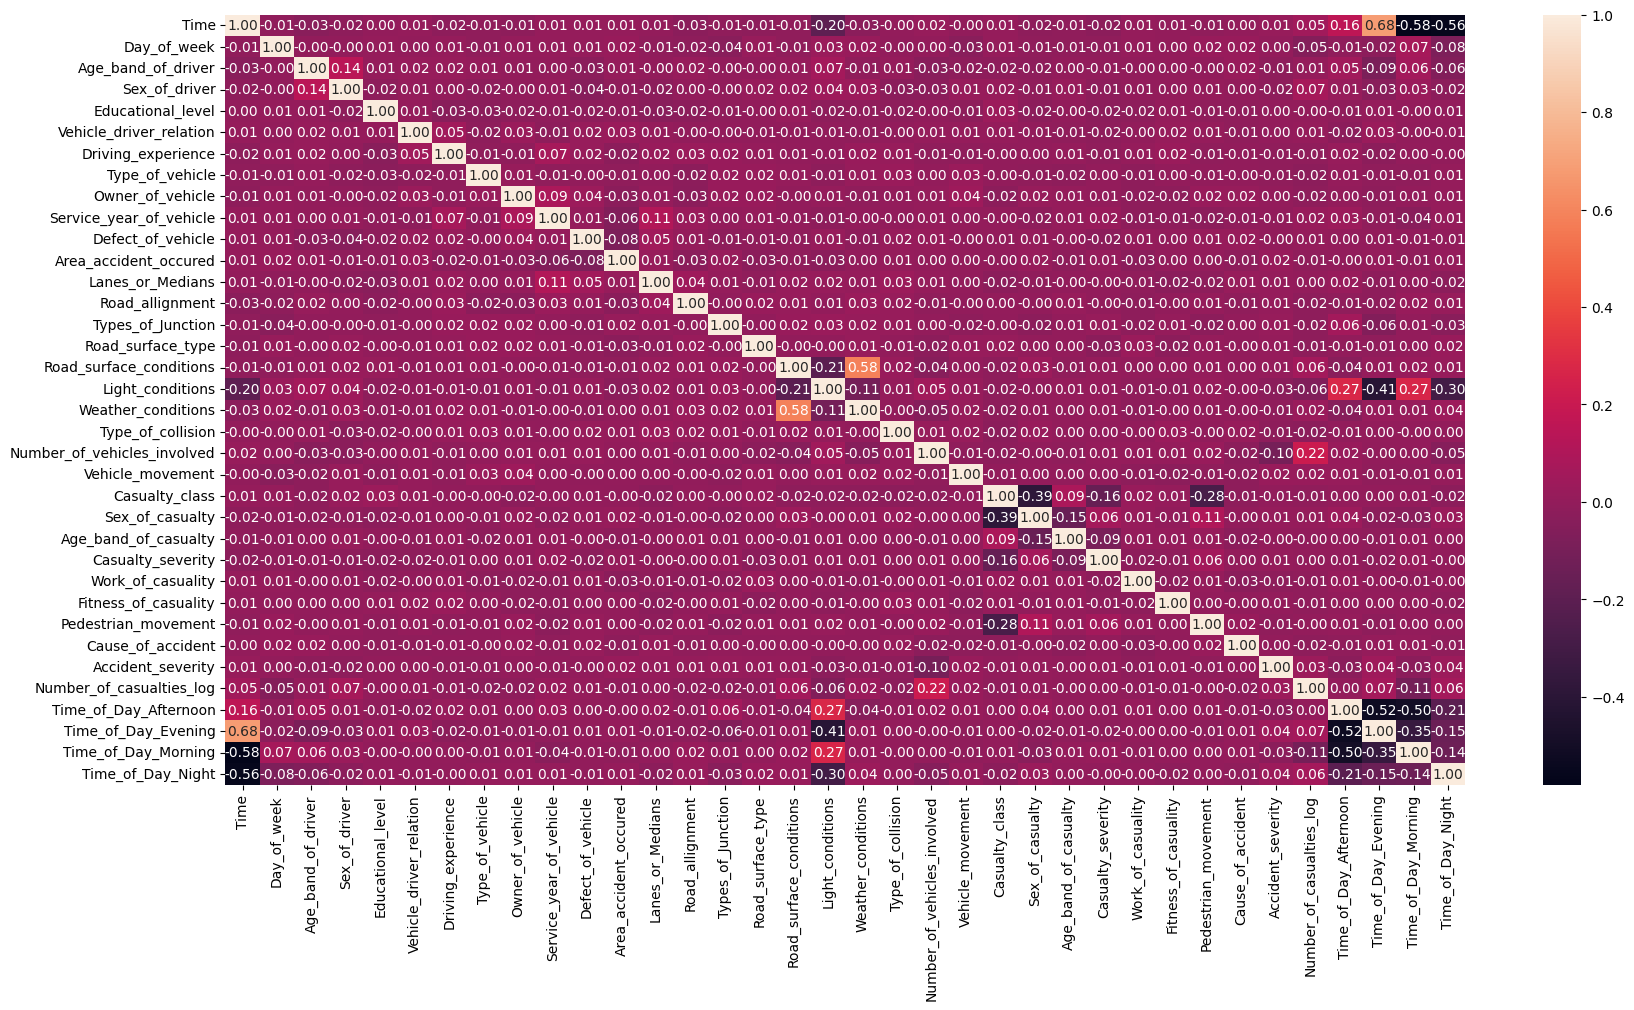

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True,fmt='.2f')

In [ ]:
df1.isna().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
Number_of_casualties_log       0
Time_of_Day_Afternoon          0
Time_of_Day_Evening            0
Time_of_Day_Morning            0
Time_of_Day_Night              0
dtype: int64

# Standardization (Z-score)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df1_standard = scaler.fit_transform(df1)

df1_standard

array([[ 0.59840617, -0.99669787, -0.82062145, ..., -0.60460771,
        -0.57770778, -0.24208209],
       [ 0.59840617, -0.99669787,  0.86280716, ..., -0.60460771,
        -0.57770778, -0.24208209],
       [-2.49594582, -0.0222655 , -0.82062145, ..., -0.60460771,
        -0.57770778,  4.13083023],
       ...,
       [-0.17518183, -0.0222655 ,  1.5716192 , ..., -0.60460771,
        -0.57770778, -0.24208209],
       [-0.17518183, -0.0222655 , -0.82062145, ..., -0.60460771,
        -0.57770778, -0.24208209],
       [-0.17518183, -0.0222655 , -0.82062145, ..., -0.60460771,
        -0.57770778, -0.24208209]])

In [ ]:
df1_standard = pd.DataFrame(df1_standard, columns=df1.columns)
df1_standard

Time  Day_of_week  Age_band_of_driver  Sex_of_driver  \
0     0.598406    -0.996698           -0.820621       0.172740   
1     0.598406    -0.996698            0.862807       0.172740   
2    -2.495946    -0.022265           -0.820621       0.172740   
3     0.598406    -1.483914           -0.820621       0.172740   
4     0.598406    -1.483914           -0.820621       0.172740   
...        ...          ...                 ...            ...   
5378  0.598406    -1.483914            0.862807       0.172740   
5379 -0.948770    -1.483914           -0.820621       0.172740   
5380 -0.175182    -0.022265            1.571619       0.172740   
5381 -0.175182    -0.022265           -0.820621      -3.607166   
5382 -0.175182    -0.022265           -0.820621       0.172740   

      Educational_level  Vehicle_driver_relation  Driving_experience  \
0              3.021155                -0.444211           -1.230430   
1              0.091171                -0.444211            1.364768   
2              0.091171                -0.444211           -0.619795   
3              0.091171                -0.444211           -0.619795   
4              0.091171                -0.444211            1.364768   
...                 ...                      ...                 ...   
5378           0.091171                -0.444211            1.364768   
5379           0.091171                -0.444211            0.601475   
5380           0.091171                -0.444211            0.601475   
5381           0.091171                -0.444211            1.364768   
5382           0.091171                -0.444211            0.601475   

      Type_of_vehicle  Owner_of_vehicle  Service_year_of_vehicle  \
0           -1.173310          0.372648                 1.411913   
1            1.281384          0.372648                 0.526576   
2           -1.173310          0.372648                 0.526576   
3           -1.173310         -2.987425                 1.411913   
4            1.092562          0.372648                -1.244100   
...               ...               ...                      ...   
5378        -0.040374         -2.987425                -1.244100   
5379         0.337271          0.372648                 1.411913   
5380        -0.984488          0.372648                -0.653875   
5381         1.092562          0.372648                -0.653875   
5382        -0.229197          0.372648                -0.653875   

      Defect_of_vehicle  Area_accident_occured  Lanes_or_Medians  \
0             -0.096513               1.081458         -0.472327   
1             -0.096513              -0.259075          0.506701   
2             -0.096513              -1.152764          1.485729   
3             -0.096513               1.081458          1.485729   
4             -0.096513              -1.152764          1.485729   
...                 ...                    ...               ...   
5378          -0.096513              -0.705920          0.506701   
5379          -0.096513              -0.705920         -0.472327   
5380          -0.096513              -0.705920         -0.472327   
5381          -0.096513              -0.259075          0.506701   
5382          -0.096513              -0.705920          0.506701   

      Road_allignment  Types_of_Junction  Road_surface_type  \
0            0.113613          -0.855217          -0.254468   
1            0.113613          -0.855217          -0.254468   
2            0.113613           1.046325          -0.254468   
3            0.113613           1.046325          -0.254468   
4            0.113613           1.046325           2.632364   
...               ...                ...                ...   
5378         0.113613          -0.094600          -0.254468   
5379         0.113613          -0.855217          -0.254468   
5380         1.855997          -0.855217          -0.254468   
5381         1.855997          -0.855217          -0.254468   
5382         1.855997    

# Dimensionality reduction

## pca

In [ ]:
x=df1_standard.drop('Accident_severity',axis=1)
y=df1_standard['Accident_severity']

In [ ]:
y.isnull().sum()

0

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
x_pca=pca.fit_transform(x)

In [ ]:
variance=pca.explained_variance_ratio_
variance

array([0.06735406, 0.05409104, 0.04736156, 0.043829  , 0.03997824,
       0.03525489, 0.03492676, 0.03299566, 0.03189226, 0.03130371])

In [ ]:
print(x_pca.shape)
print(df1_standard.shape)

(5383, 10)
(5383, 36)


In [ ]:
total_variance=np.sum(variance)
total_variance

0.41898717794623935

<Axes: ylabel='Accident_severity'>

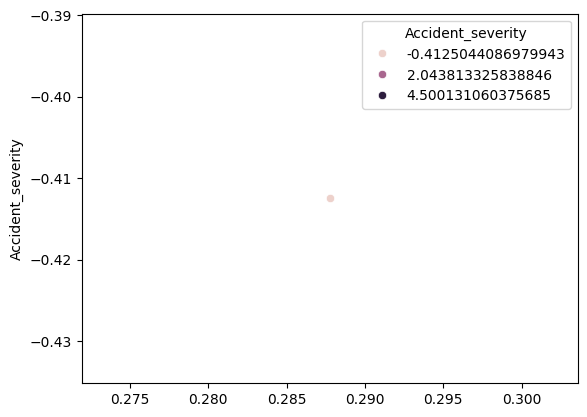

In [ ]:
sns.scatterplot(x=x_pca[:,0],y=y[:1],hue=y)

In [ ]:
df1_pca=pd.DataFrame(x_pca,columns=['pca_1','pca_2','pca_3','pca_4','pca_5','pca_6','pca_7','pca_8','pca_9','pca_10'])
df1_pca

pca_1     pca_2     pca_3     pca_4     pca_5     pca_6     pca_7  \
0     0.287759  1.426106 -0.828710 -0.232098  0.915186 -1.091598  0.290144   
1     0.014462  1.604616 -1.226515  0.193222  0.520445  0.787541  0.315233   
2    -1.623332 -2.791951 -0.759040 -1.282309  3.616186  1.125133  0.045898   
3     0.103954  1.646884 -1.098255  0.249169  0.781649  0.184084 -0.591468   
4     0.069424  1.657020  2.096876  1.632072  1.464555  0.752621 -1.037854   
...        ...       ...       ...       ...       ...       ...       ...   
5378 -0.096072  1.491996 -0.872932  0.272322  0.083138 -0.813737 -1.636159   
5379 -1.824398 -0.413439  1.250462 -0.426471 -0.077596  1.378309 -0.386208   
5380 -0.733468  1.368088 -0.576155  0.348253  0.073741  0.096323 -1.042607   
5381  0.369896  0.314196 -1.003864 -0.604558  1.380896  1.644562 -1.793090   
5382  0.368014  0.580755  3.236062  1.750923  1.866094  0.832839 -0.676423   

         pca_8     pca_9    pca_10  
0    -0.032744 -0.738909 -0.159830  
1     0.894301  0.573833  0.051202  
2     0.324271  0.201125  0.424263  
3    -0.558742  1.533746 -0.194583  
4    -0.535346  0.634710 -1.049332  
...        ...       ...       ...  
5378  0.859309  0.406834  1.777633  
5379  0.632010  0.098369 -0.908883  
5380  1.907046 -0.594558  1.025469  
5381 -1.932131 -0.411238  0.840668  
5382 -0.527904  0.812204 -0.651441  

[5383 rows x 10 columns]

<Axes: >

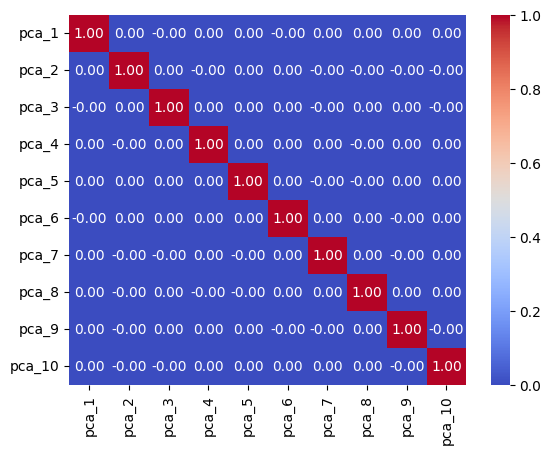

In [ ]:
sns.heatmap(df1_pca.corr(),annot=True,fmt='.2f',cmap='coolwarm')

In [ ]:
print(df1_pca.shape)
print(df1.shape)

(5383, 10)
(5383, 36)


# modeling

In [ ]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
y=y.astype(int)
x_train,x_test,y_train,y_test=train_test_split(df1_pca,y,test_size=0.2,random_state=42)

In [ ]:

# List of classification models to apply
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Classifier": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="weighted")
    recall = recall_score(y_true, y_pred, average="weighted")
    f1 = f1_score(y_true, y_pred, average="weighted")
    return accuracy, precision, recall, f1

In [ ]:

# Dictionary to store the results
results = {}

# Apply each model and compute metrics
for name, model in models.items():
    if name in ["Support Vector Classifier", "Neural Network"]:  # Models requiring scaling
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
    else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
    # Compute evaluation metrics
    accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
results_df = pd.DataFrame(results).T  # Transpose for better readability
results_df.index.name = "Model"
print(results_df)

                           Accuracy  Precision    Recall  F1-Score
Model                                                             
Logistic Regression        0.844940   0.713923  0.844940  0.773926
Decision Tree              0.756732   0.764657  0.756732  0.760477
Random Forest              0.844940   0.784103  0.844940  0.775687
Gradient Boosting          0.834726   0.732542  0.834726  0.771683
Support Vector Classifier  0.844940   0.713923  0.844940  0.773926
K-Nearest Neighbors        0.830084   0.741485  0.830084  0.774003
Neural Network             0.819870   0.716586  0.819870  0.763168


## RandomForestClassifier

In [ ]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.8421541318477251


In [ ]:
model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model1.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.8449396471680595


In [ ]:
model2=SVC()
model2.fit(x_train,y_train)

SVC()

In [ ]:
y_pred=model2.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.8449396471680595


#voting classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_clf_hard = VotingClassifier(
    estimators=[
        ("Logistic Regression", LogisticRegression()),
        ("Random Forest", RandomForestClassifier()),
        ("SVC", SVC()),
    ],
    voting="hard"  # Use "soft" for weighted probabilities
)

In [ ]:
voting_clf_hard.fit(x_train, y_train)

VotingClassifier(estimators=[('Logistic Regression', LogisticRegression()),
                             ('Random Forest', RandomForestClassifier()),
                             ('SVC', SVC())])

In [ ]:
y_pred_hard = voting_clf_hard.predict(x_test)


In [ ]:
# Evaluate performance
accuracy_hard = accuracy_score(y_test, y_pred_hard)
print(f'Hard Voting Classifier Accuracy: {accuracy_hard:.4f}')

Hard Voting Classifier Accuracy: 0.8449


In [ ]:


from sklearn.ensemble import VotingClassifier
voting_clf_soft = VotingClassifier(
    estimators=[
        ("Logistic Regression", LogisticRegression(random_state=42)),
        ("Random Forest", RandomForestClassifier()),
        ("SVC", SVC(probability=True)),
    ],
    voting="soft"  # Use "soft" for weighted probabilities
)

# Fit the VotingClassifier to the training data
voting_clf_soft.fit(x_train, y_train)

y_pred_soft = voting_clf_soft.predict(x_test)

# Evaluate performance (Corrected to use y_pred_soft)
accuracy_soft = accuracy_score(y_test, y_pred_soft)
print(f'Soft Voting Classifier Accuracy: {accuracy_soft:.4f}')

Soft Voting Classifier Accuracy: 0.8449
